# Analysis of the WA Public Sector Employee Perception Survey <a class="anchor" id="top"></a>

## Table of contents

*  Introduction
 *  Purpose
 *  Data origin
 *  Short privacy assessment of the project
 *  Data flow
*  [1. Import of Python libraries, survey data and survey keys](#section1)
*  [2. Data exploration](#section2)
*  [3. Data cleaning and aggregation](#section3)
 *  [Identification of super-categories by hierarchical clustering](#section3-1)
 *  [Aggregation of data](#section3-2)
      * [Aggregation of question A4 - position retention at the current agency](#section3-2-1)
      * [Aggregation of question B7 - public sector standard compliance in the agency](#section3-2-2)
      * [Aggregation of question B8 - performance management meetings](#section3-2-3)
      * [Aggregation of question C4 - ethical behaviour](#section3-2-4)
      * [Aggregation of question C6 - nature of bullying](#section3-2-5)
      * [Miscellaneous tables](#section3-2-6)
*  [4. Data analysis and visualisation](#section4)
 *  [Is there a general gender divide  in the public sector in WA?](#section4)
 *  [Are female satisfied with their job and agency?](#section4-1)
 *  [Are women in disadvantage position in the public sector due to the lack of career progression??](#section4-2)
 *  [Perception to work and life balance of female employees in the WA public sector](#section4-3)
 * [Workplace culture in the WA public sector](#section4-4) (work in progress)
*  [5. Summary and conclusion](#section5)
*  [Supplementary codes](#section7)

### Purpose
A report series by the Bankwest Curtin Economics Centre indicates that increasing women representation in the leadership/management team boosts company performance and profitability and improves productivity. It is therefore not surprising that more and more companies in the business sector have introduced diversity metrics relating to recruitment, training, progression and pay to determine how female staff is treated compared with male counterparts.

How the WA public sector is reducing gender gaps compared to the business sector? This notebook aims to determine if there are gender divides in job satisfaction, salary and career opportunities within the WA public sector based on a public sector survey conducted in 2015. I will also examine if workplace behaviour and perceptions on workplace diversity, integrity and ethics could influence women's decision in progressing to leadership positions. 


### Data origin
Data were acquired from https://data.gov.au/data/organization/public-sector-commission-wa and it is available in the same folder as this Notebook.

### Short privacy impact assessment of the project
The data appears to be free of identifiable personal information. The release of the analysed dataset poses no to extremely low privacy risk to survey participants.

### Data flow
The raw data in excel file contains three workshheets. These sheets are saved separately in csv and imported into this Jupyter notebook with pandas. Data exploration, cleaning and visualisation will be conducted in this workbook. Conclusion will then be drawn from the analysis in this workbook.

## 1. Import of Python libraries, survey data and survey keys <a class="anchor" id="section1"></a>

[Back to the top](#top)

In [1]:
#!pip install seaborn
#!conda install -c conda-forge pingouin
#!pip install pingouin
import pandas as pd
import numpy as np
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import pingouin as pg
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
full_survey = pd.read_csv('full_survey_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (105) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(f'This dataset contains {full_survey.shape[1]} questions and {full_survey.shape[0]} rows of most likely individual respondents')

This dataset contains 110 questions and 11405 rows of most likely individual respondents


In [4]:
full_survey[full_survey.duplicated()]

,A1a,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,...,C6ax,C6axi,C7,C8,C9,D1,D3,D8,D14,AgencySize


There is no duplicated rows - it is unlikely to have duplicated entry in the dataset.

In [5]:
response_key = pd.read_csv('response-key.csv')
response_key

,Question ID,Value,Label
0,A1a,1,Very satisfied
1,A1a,2,Moderately satisfied
2,A1a,3,Mildly satisfied
3,A1a,4,Neither satisfied nor dissatisfied
4,A1a,5,Mildly dissatisfied
...,...,...,...
533,D14,1,Yes
534,D14,2,No
535,AgencySize,1,Less than 200 employees
536,AgencySize,2,200 to 1000 employees


In [6]:
question_key = pd.read_csv('question-key.csv', encoding='ISO-8859-1')
question_key

,Question ID,Question
0,A1a,Please indicate your level of satisfaction wit...
1,A1b,Please indicate your level of satisfaction wit...
2,A2a,"My job allows me to utilise my skills, knowled..."
3,A2b,I am clear what my duties and responsibilities...
4,A2c,I understand how my work contributes to my age...
...,...,...
105,D1,What is your gender?
106,D3,What is the highest level of formal education ...
107,D8,What is your current total annual gross salary...
108,D14,Are you employed in one of the top four levels...


Note that the response key and question key share the same Question ID values. It is decided that these tables are merged together to generate a super table for convenience down the track. Before doing so, however, I will need to ensure that there is no trailing space in all the columns in all of our tables.

In [7]:
full_survey.columns = full_survey.columns.str.strip()
response_key.columns = response_key.columns.str.strip()
question_key.columns = question_key.columns.str.strip()

print(f'{question_key.columns} \n {response_key.columns} \n {full_survey.columns}')

Index(['Question ID', 'Question'], dtype='object') 
 Index(['Question ID', 'Value', 'Label'], dtype='object') 
 Index(['A1a', 'A1b', 'A2a', 'A2b', 'A2c', 'A2d', 'A2e', 'A2f', 'A2g', 'A2h',
       ...
       'C6ax', 'C6axi', 'C7', 'C8', 'C9', 'D1', 'D3', 'D8', 'D14',
       'AgencySize'],
      dtype='object', length=110)


In [8]:
merged_key = response_key.merge(question_key, on='Question ID')
merged_key.head(50)

,Question ID,Value,Label,Question
0,A1a,1,Very satisfied,Please indicate your level of satisfaction wit...
1,A1a,2,Moderately satisfied,Please indicate your level of satisfaction wit...
2,A1a,3,Mildly satisfied,Please indicate your level of satisfaction wit...
3,A1a,4,Neither satisfied nor dissatisfied,Please indicate your level of satisfaction wit...
4,A1a,5,Mildly dissatisfied,Please indicate your level of satisfaction wit...
5,A1a,6,Moderately dissatisfied,Please indicate your level of satisfaction wit...
6,A1a,7,Very dissatisfied,Please indicate your level of satisfaction wit...
7,A1b,1,Very satisfied,Please indicate your level of satisfaction wit...
8,A1b,2,Moderately satisfied,Please indicate your level of satisfaction wit...
9,A1b,3,Mildly satisfied,Please indicate your level of satisfaction wit...


I then plot the response value (the Value column group by Question ID) to see if all questions have a similar value range

Text(0, 0.5, 'Max response')

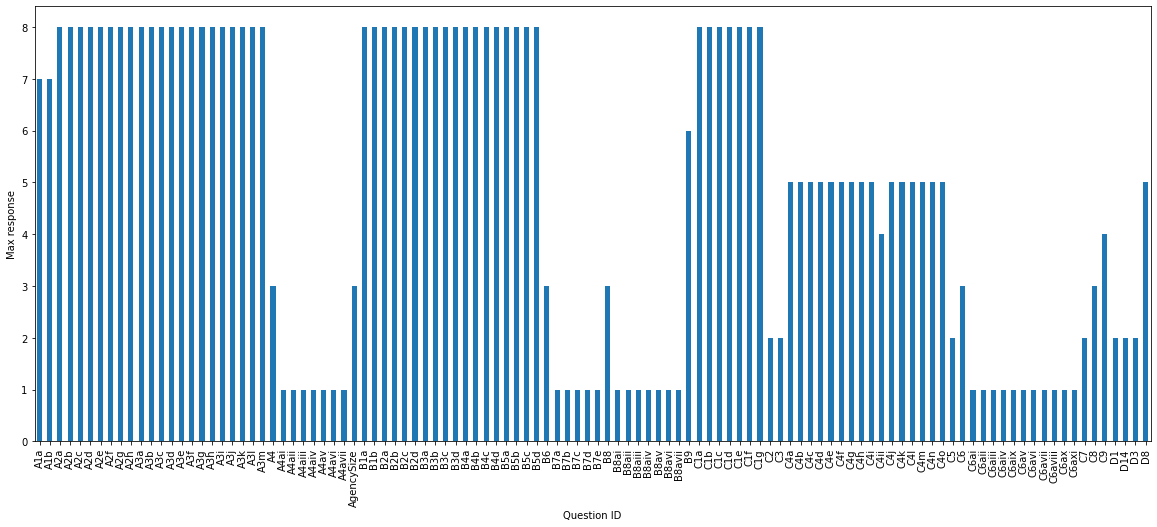

In [9]:
plt.figure(figsize=(20,8))
merged_key.groupby('Question ID').describe().Value['max'].plot(kind='bar')
plt.ylabel('Max response')

I noticed that questions appear to be categoried into 'A', 'B', 'C' and 'D'.
Also, most max value response are either 7 or 8. Values less than these should be considered separately, e.g A4 and A4ai to A4avii. 

Some of the official statistics of the WA public sector in 2015 will be also featured in this report:

In [10]:
public_sector_stat = pd.read_csv('wa-public-sector-workforce-profile-june-2015.csv')
public_sector_stat.head()

,Entity,Headcount,FTE,Female %,Male %,Female median age,Male median age,Agency median age,Age less than 20,Age 20 to 24,...,Number of people with culturally diverse background,People with culturally diverse background Representation,People with culturally diverse background Equity Index,People with disability valid responses,People with disability % Valid responses,Number of People with disability,People with disability Representation,People with disability Equity Index,Unnamed: 101,Unnamed: 102
0,WA public sector,138440,109019,72.30%,27.70%,45.3,47.8,45.9,0.40%,4.00%,...,10082,12.40%,96.1,87350,63.10%,1873,2.10%,101.7,0.00%,0.00%
1,Department of Agriculture and Food,1111,999,45.50%,54.50%,45.0,52.9,49.0,0.30%,2.60%,...,151,14.00%,89.7,1023,92.10%,18,1.80%,103.5,0.00%,0.00%
2,Art Gallery of Western Australia,66,53,71.20%,28.80%,46.8,52.1,46.9,0.00%,1.50%,...,4,7.40%,468.8,47,71.20%,2,4.30%,19.4,0.00%,0.00%
3,Animal Resources Authority,71,44,73.20%,26.80%,31.9,39.1,32.9,1.40%,11.30%,...,4,5.60%,406.7,71,100.00%,2,2.80%,12.0,0.00%,0.00%
4,Botanic Gardens and Parks Authority,153,119,52.90%,47.10%,42.5,44.5,43.1,2.60%,5.20%,...,15,9.90%,74.2,152,99.30%,1,0.70%,2.7,0.00%,0.00%


## 2. Data exploration <a class="anchor" id="section2"></a>
[Back to the top](#top)

Given that there are 110 questions in the survey, it would be beneficial to aggregate closely related questions with a similar response pattern in order reduce the number of categories/variables for interpretation later on. Before doing so, I would like to look at how questions are structured within the survey.

In [11]:
full_survey.filter(regex = '^[A][0-9][\w]{0,5}').columns.size #get the number of columns with 'A' questions

31

In [12]:
full_survey.filter(regex = '^[A][0-9][\w]{0,5}').columns

Index(['A1a', 'A1b', 'A2a', 'A2b', 'A2c', 'A2d', 'A2e', 'A2f', 'A2g', 'A2h',
       'A3a', 'A3b', 'A3c', 'A3d', 'A3e', 'A3f', 'A3g', 'A3h', 'A3i', 'A3j',
       'A3k', 'A3l', 'A3m', 'A4', 'A4ai', 'A4aii', 'A4aiii', 'A4aiv', 'A4av',
       'A4avi', 'A4avii'],
      dtype='object')

Question A4 is possibily linked to A4ai, A4aii, etc... Lets check them out:

In [13]:
QA_key= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'A4') | \
                   (merged_key['Question ID'] == 'A4ai') | \
                   (merged_key['Question ID'] == 'A4aii'))]\
['Question']

print(f'Question A4: {QA_key[182]}\nQuestion A4ai: {QA_key[185]}\nQuestion A4aii {QA_key[186]}')

Question A4: It is likely that you will leave your agency within:
Question A4ai: If you intend to leave your agency within the next 2 years, are you planning to: Work for another agency
Question A4aii If you intend to leave your agency within the next 2 years, are you planning to: Work in federal or local government


I next 'hunt down' all the questions that contain subquestions. Here, I will use a combination of iloc and filter functions to look for their index numbers. 

In [14]:
full_survey.filter(regex = '^[A][0-9][\w]{0,5}').columns.size #get the number of columns with 'A' questions

31

In [15]:
full_survey.iloc[:,:31]  #get all the columns of A-type questions

,A1a,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,...,A3l,A3m,A4,A4ai,A4aii,A4aiii,A4aiv,A4av,A4avi,A4avii
0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,...,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,6.0,5.0,6.0,6.0,5.0,7.0,7.0,7.0,7.0,3.0,...,4.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,...,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11402,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11403,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
full_survey.iloc[:,:23]  #get only the columns of A-type questions without subquestions (i.e. A4ai, A4aii etc)

,A1a,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,...,A3d,A3e,A3f,A3g,A3h,A3i,A3j,A3k,A3l,A3m
0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,...,2.0,2.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0
1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,...,3.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0
2,6.0,5.0,6.0,6.0,5.0,7.0,7.0,7.0,7.0,3.0,...,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,...,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0
11401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11402,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,4.0,3.0,2.0,2.0,2.0,3.0,3.0,1.0,1.0
11403,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0


So full_survey.iloc[:,:24] will be used for classification and aggregation later, 
whereas full_survey.iloc[:,24:31] will be considered separately.
Note that A1a and A1b has different number of response keys (7 instead of 8) therefore they will also be displayed/analysed separately, as indicated in the next section.

Let's do the same for B questions:

In [17]:
full_survey.filter(regex = '^[B][0-9][\w]{0,5}').columns.size #get the number of columns with 'B' questions

33

In [18]:
full_survey.filter(regex = '^[B][0-9][\w]{0,5}')

,B1a,B1b,B2a,B2b,B2c,B2d,B3a,B3b,B3c,B3d,...,B7e,B8,B8ai,B8aii,B8aiii,B8aiv,B8av,B8avi,B8avii,B9
0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,...,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0
1,4.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,4.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,7.0,7.0,5.0,5.0,7.0,7.0,4.0,5.0,5.0,5.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,2.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
11401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,4.0
11402,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
11403,2.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,3.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0


That's quite a lot of NaN for B7 type questions. Let's have a look at these questions:

In [19]:
QB7_key= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B7a') | \
                   (merged_key['Question ID'] == 'B7b') | \
                   (merged_key['Question ID'] == 'B7c') | \
                   (merged_key['Question ID'] == 'B7d') | \
                   (merged_key['Question ID'] == 'B7e'))]\
['Question']

for key in QB7_key:
    print(key)

Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Yes, and I raised it with my agency
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Yes, and I lodged a breach of standard claim
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Yes, and I took no action (please specify reason)
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: No
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Dont know


Question B7 appears to be separated into different responses, a, b, c etc, somewhat similar to a mulitple choice question. I will need to transform B7 questions into one column of different responses, A B C etc.

Now look at B8 questions:

In [20]:
QB8_key= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B8') | \
                   (merged_key['Question ID'] == 'B8ai') | \
                   (merged_key['Question ID'] == 'B8aii'))]\
['Question']

for key in QB8_key:
    print(key)

If you have been employed in your agency for more than 12 months, have you participated in one or more formal, documented performance management meetings with your immediate supervisor in the past 12 months?
If yes, which of the following topics were discussed within these formal, documented, meetings?: My work performance over the last year
If yes, which of the following topics were discussed within these formal, documented, meetings?: My upholding of ethical codes such as my agencys code of conduct or values


Question B8 is a question that contains follow-up questions like A4 above. For B8 subquestions, data treatment and analysis will be the same as A4. 

B6 and B9 have response keys of less than 8. Let's examine these questions:

In [21]:
QB6_key = merged_key[(merged_key['Value'] == 1) & (merged_key['Question ID'] == 'B6')]['Question'][336]
print(f'Question 6: {QB6_key}')

Question 6: Are you aware of the Public Sector Standards in Human Resource Management?


In [22]:
QB9_key = merged_key[(merged_key['Value'] == 1) & (merged_key['Question ID'] == 'B9')]['Question'][354]
print(f'Question 9: {QB9_key}')

Question 9: How often do you meet with your immediate supervisor informally in a setting that allows for discussion about performance and development matters?


These questions should not be aggregated with other data, but they can be interpreted together with aggregated data if applicable.

Lastly, get all the columns of B-type questions without B6 to B9

In [23]:
full_survey.iloc[:,np.r_[31:49]] 

,B1a,B1b,B2a,B2b,B2c,B2d,B3a,B3b,B3c,B3d,B4a,B4b,B4c,B4d,B5a,B5b,B5c,B5d
0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,4.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0
1,4.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0,3.0,5.0,2.0,2.0,2.0,2.0
2,7.0,7.0,5.0,5.0,7.0,7.0,4.0,5.0,5.0,5.0,7.0,4.0,6.0,6.0,4.0,3.0,3.0,3.0
3,2.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0
11401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11402,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0
11403,2.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0


In [24]:
for key in full_survey.iloc[:,np.r_[31:49]]:
    print(key)
#display all columns to make sure everything is ok

B1a
B1b
B2a
B2b
B2c
B2d
B3a
B3b
B3c
B3d
B4a
B4b
B4c
B4d
B5a
B5b
B5c
B5d


C Questions have 3 different categories of max value:

C1a to C1g: 8; 

C2 to C3 and C5 to C9: 2-4;

C4a to C4o: 5.

C2-C3 and C5-C9 should be treated and analysed separately. Let's explore some of C5-C9 questions:

In [25]:
QC2_key= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'C2') | \
                   (merged_key['Question ID'] == 'C3') | \
                   (merged_key['Question ID'] == 'C7') | \
                   (merged_key['Question ID'] == 'C8') | \
                   (merged_key['Question ID'] == 'C9'))]\
['Question']

for key in QC2_key:
    print(key)

Are you familiar with the Public Sector Code of Ethics?
Are you familiar with your agency code of conduct?
Do you know how to report bullying in your workplace?
Are you aware of the PID Act and how to make a disclosure?
Would you use the PID Act to make a disclosure of public interest information to a proper authority if you were aware of unethical behaviour in your workplace?


Some of these questions respond with a Y/N answer, which explains why their max respond keys are less than 8.

In [26]:
QC4_key= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'C4o') | \
                   (merged_key['Question ID'] == 'C4ii') | \
                   (merged_key['Question ID'] == 'C6') | \
                   (merged_key['Question ID'] == 'C6ai') | \
                   (merged_key['Question ID'] == 'C6aii') | \
                   (merged_key['Question ID'] == 'C6aiii'))]['Question']

for key in QC4_key:
    print(key)

Have you witnessed any of the following types of unethical behaviour in your workplace in the last 12 months, and if so how often?: Secretly holding another job outside government without agency permission
If you have witnessed unethical behaviour in your workplace, did you report it?
During the past 12 months, have you been subjected to repeated bullying in your workplace?
If yes, which of the following describes the nature of the bullying you have experienced?: Verbally abusing, insulting or offending me, including criticising me in the form of yelling or screaming
If yes, which of the following describes the nature of the bullying you have experienced?: Spreading misinformation or malicious rumours
If yes, which of the following describes the nature of the bullying you have experienced?: Teasing or regularly making me the brunt of practical jokes or pranks


Next, explore C questions with the same technique as above:

In [27]:
full_survey.filter(regex = '^[C][0-9][\w]{0,5}').columns.size #get the number of columns with 'C' questions

41

In [28]:
full_survey.iloc[:,np.r_[64:71, 73:89]] #get all the columns of C-type questions without subquestions

,C1a,C1b,C1c,C1d,C1e,C1f,C1g,C4a,C4b,C4c,...,C4g,C4h,C4i,C4j,C4k,C4l,C4m,C4n,C4o,C4ii
0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,3.0,3.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,4.0,4.0,4.0,5.0,5.0,4.0,3.0,5.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
3,2.0,3.0,8.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,...,3.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
11401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
11402,2.0,3.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,1.0,...,3.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0
11403,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
for key in full_survey.iloc[:,np.r_[64:71, 73:89]]:
    print(key)

C1a
C1b
C1c
C1d
C1e
C1f
C1g
C4a
C4b
C4c
C4d
C4e
C4f
C4g
C4h
C4i
C4j
C4k
C4l
C4m
C4n
C4o
C4ii


In [30]:
for key in full_survey.iloc[:,np.r_[71:73, 90:105]]:
    print(key)
#These are questions/columns with max value in response-key less than 8

C2
C3
C6
C6ai
C6aii
C6aiii
C6aiv
C6av
C6avi
C6avii
C6aviii
C6aix
C6ax
C6axi
C7
C8
C9


Lastly, explore D questions and see the kind of questions they hold:

In [31]:
full_survey.filter(regex = '^[D][0-9][\w]{0,5}').columns.size #get the number of columns with 'D' questions

4

In [32]:
full_survey.iloc[:,-5:-1]

,D1,D3,D8,D14
0,1,2.0,3.0,2.0
1,1,2.0,3.0,2.0
2,2,2.0,2.0,2.0
3,2,1.0,2.0,2.0
4,1,1.0,1.0,2.0
...,...,...,...,...
11400,1.0,2.0,2.0,2.0
11401,1.0,1.0,3.0,2.0
11402,2.0,2.0,2.0,2.0
11403,2.0,2.0,2.0,2.0


In [33]:
QD_key= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'D1') | \
                   (merged_key['Question ID'] == 'D3') | \
                   (merged_key['Question ID'] == 'D8') | \
                   (merged_key['Question ID'] == 'D14')| \
                   (merged_key['Question ID'] == 'AgencySize'))]\
['Question']

for key in QD_key:
    print(key)

What is your gender?
What is the highest level of formal education you have completed?
What is your current total annual gross salary (before tax)?
Are you employed in one of the top four levels of management in your agencys organisational hierarchy (e.g. General Manager, Executive Director, Chief Executive Officer)?
Size of agency (headcount)


The D questions along with 'AgencySize' are useful for producing descriptive statistics with the groupby function (or make pivot table). 

In [34]:
full_survey.loc[full_survey['A1a'].isnull()]

,A1a,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,...,C6ax,C6axi,C7,C8,C9,D1,D3,D8,D14,AgencySize
227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,NaN,2,1.0,1.0,2.0,3
347,NaN,NaN,4.0,1.0,1.0,4.0,4.0,3.0,4.0,3.0,...,NaN,NaN,2.0,3.0,NaN,2,1.0,2.0,2.0,3
430,NaN,NaN,1.0,2.0,1.0,2.0,3.0,5.0,6.0,4.0,...,NaN,NaN,1.0,2.0,NaN,2,1.0,3.0,2.0,3
456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,2,1.0,2.0,2.0,3
505,NaN,NaN,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,...,NaN,NaN,1.0,2.0,NaN,2,2.0,3.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,NaN,NaN,3.0,3.0,3.0,NaN,3.0,3.0,4.0,4.0,...,NaN,NaN,2.0,2.0,NaN,1.0,2.0,3.0,2.0,2
11193,NaN,NaN,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,...,NaN,NaN,2.0,1.0,NaN,1.0,2.0,4.0,2.0,2
11275,NaN,NaN,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,1.0,3.0,NaN,1.0,1.0,1.0,2.0,2
11296,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,NaN,2.0,2.0,NaN,1.0,2.0,4.0,2.0,2


Lastly there appears to be missing values in many columns. It might be a good idea to leave them blank (avid assigning them to zero!) so that when a math function is called I will just skip these with, for example, 'skipna' or similar functions.


## 3. Data cleaning and aggregation <a class="anchor" id="section3"></a>

[Back to the top](#top)

#### Identification of super-categories by hierarchical clustering <a class="anchor" id="section3-1">
As explored above, this data has 110 variables (questions) many which are categorical. The aggregation task for this dataset shall be to aggregate over factors affecting workplace, such as leadership, communication, work/life balance and performance development. The first step to identify aggregable groups is by performing a pairwise correlation analysis across  the variables selected above. I then visualise the r values using a heat map:

<AxesSubplot:>

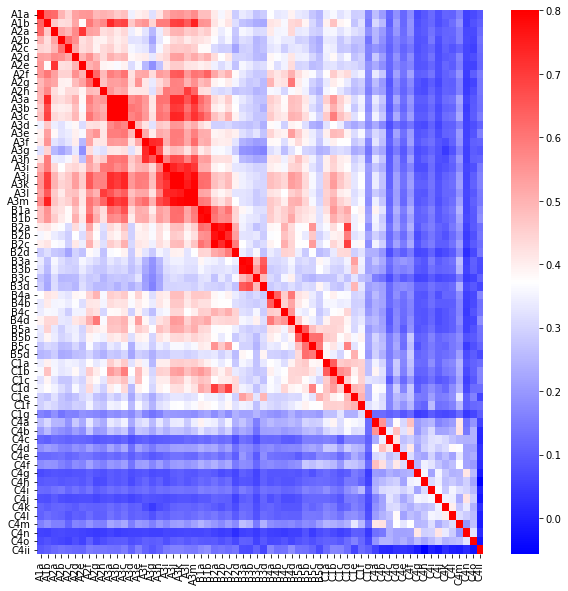

In [35]:
a = full_survey.iloc[:,np.r_[0:23, 31:49, 64:71, 73:89]].corr()
fig, Corr_heatmap = plt.subplots(figsize=(10, 10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, vmax=0.8, cmap='bwr')

A better way to visualise the above is to make a hierarchical heat map to group similar variables together:

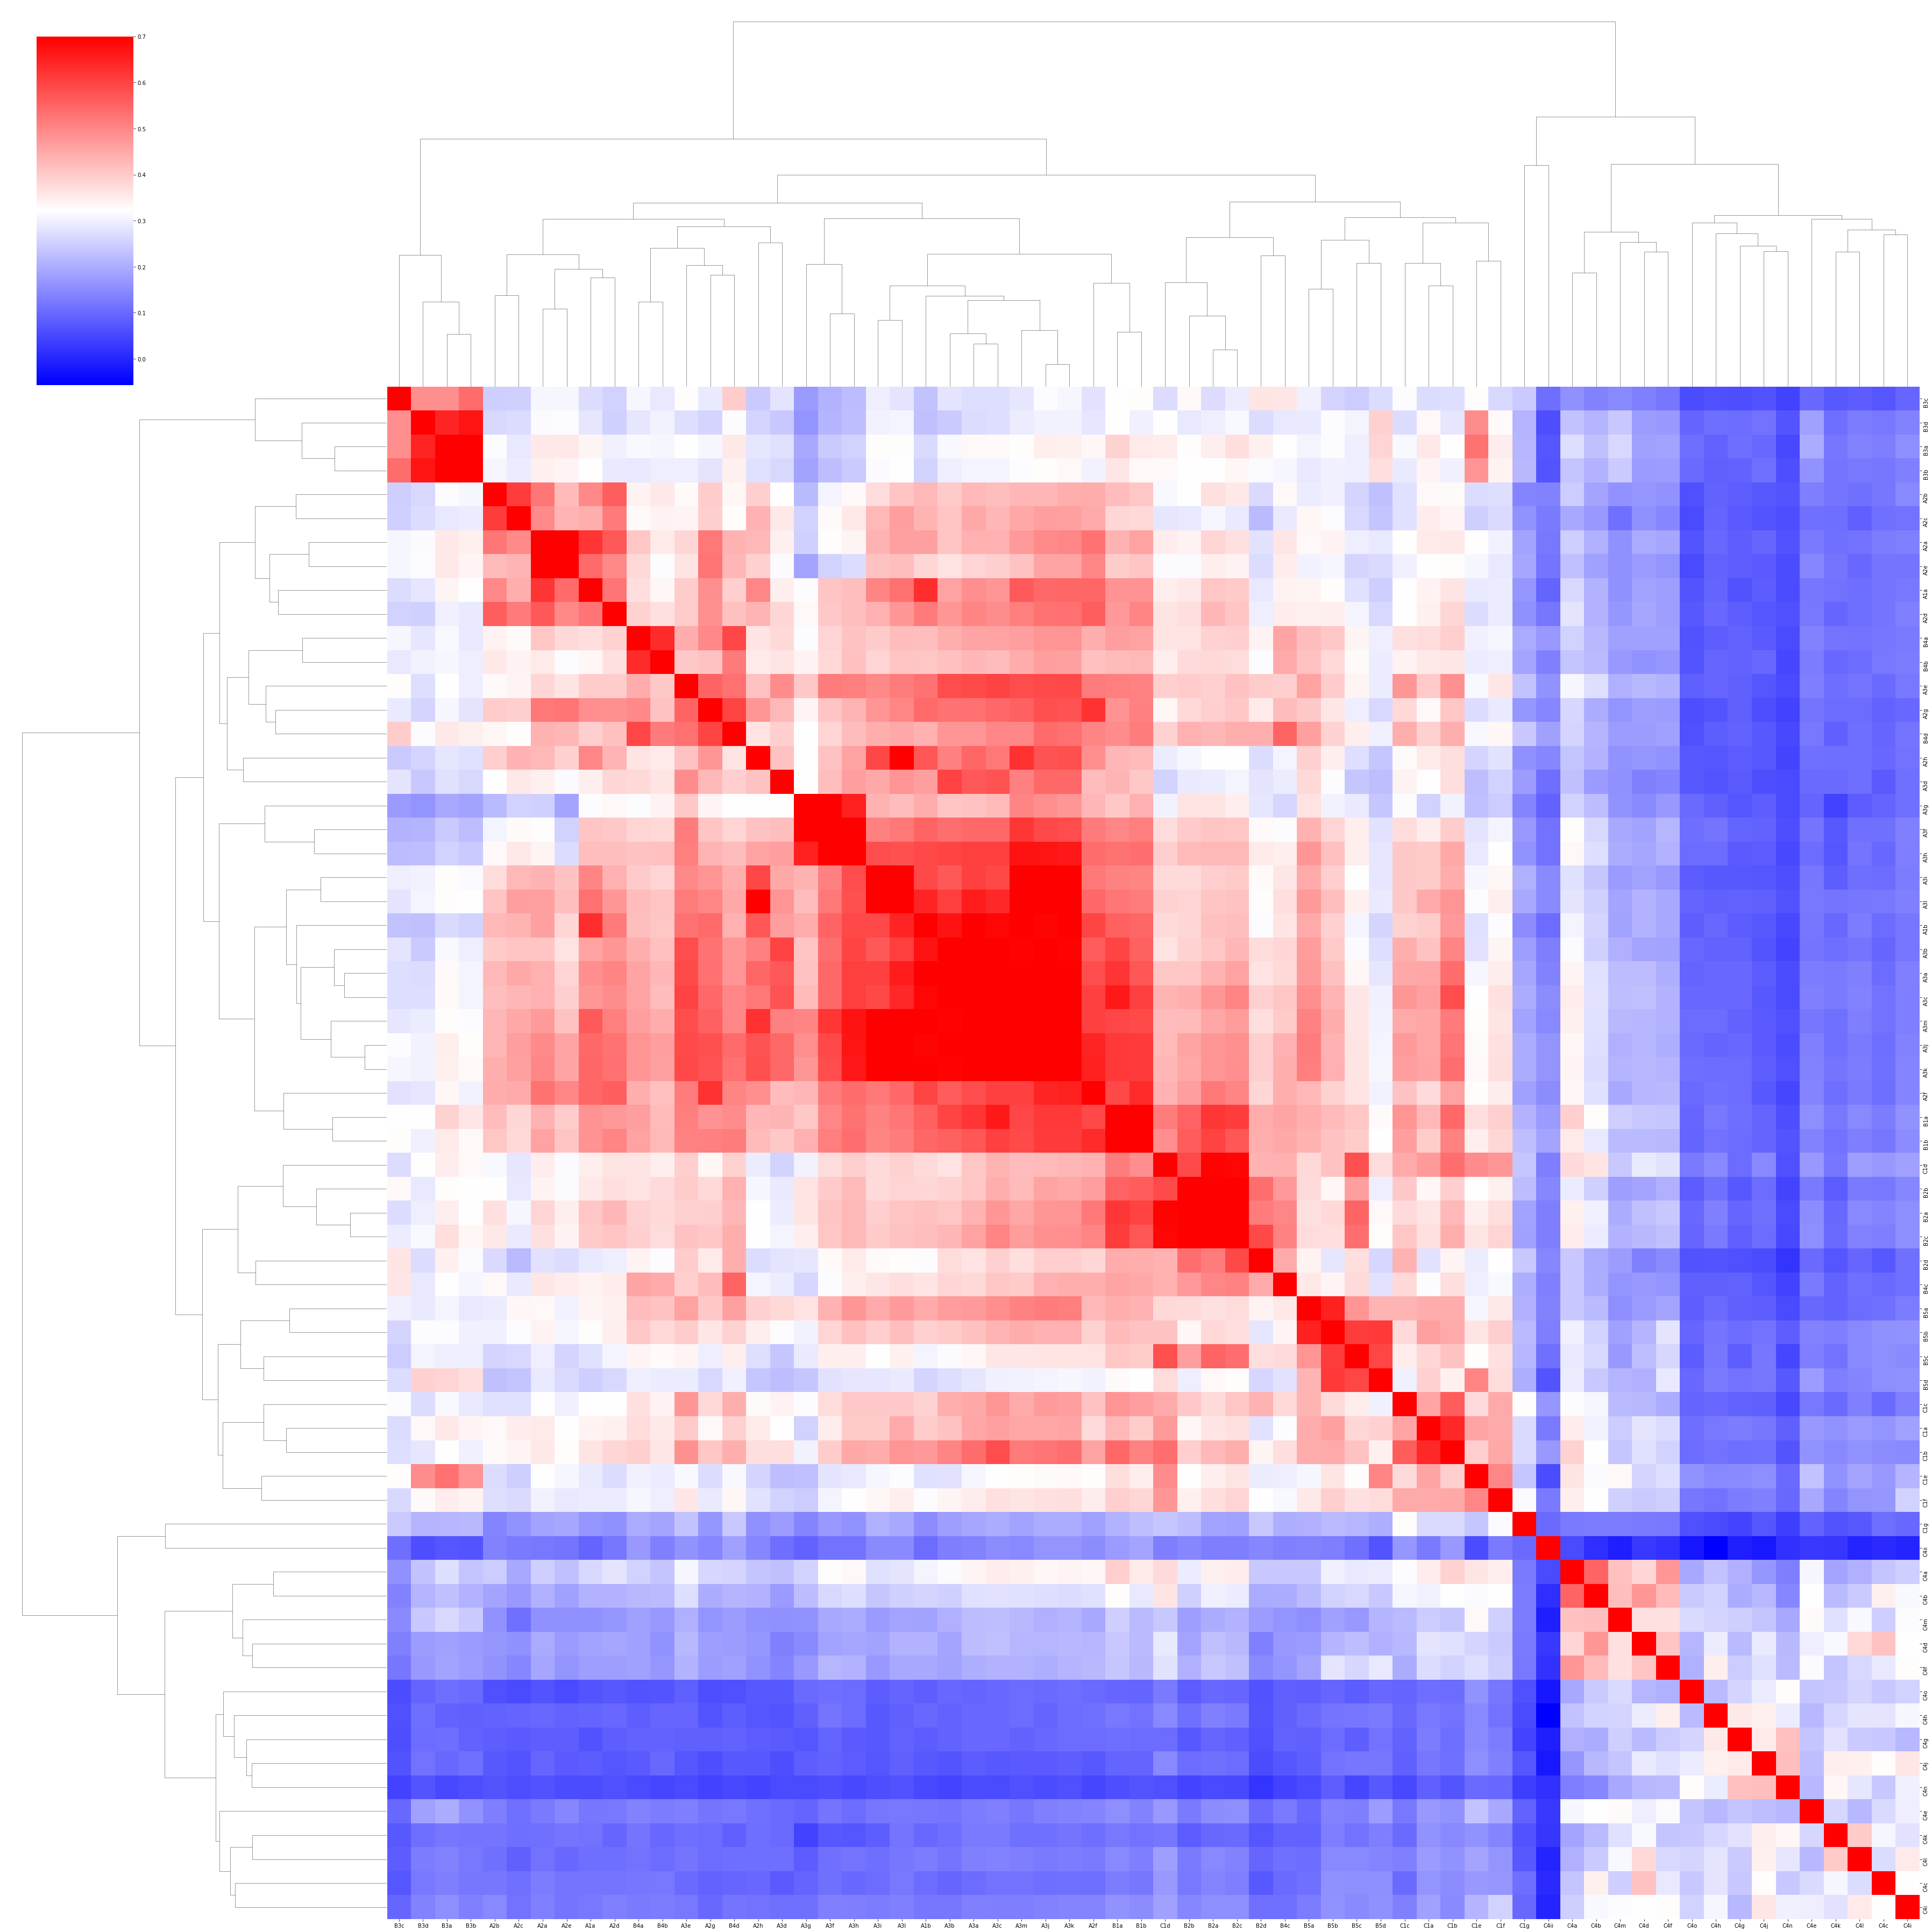

In [36]:
sns.clustermap(a, figsize=(50, 50), vmax=0.7, cmap='bwr') #need bigger image size to see the labels in anaconda notebook
#otherwise one can export the cluster map and work on it in an image browser/processor

From the above image, I can observe the following clusters:
- B3a, B3b, B3c, B3d (Cluster 1)
- A2a, A2b, A2c, A2d + A1a (Cluster 2)
- B4a, B4b, A3d, A3e, A2g, B4d (Cluster 3)
- A3f, A3g, A3h (Cluster 4)
- A3i, A3l, A3b, A3a, A3c, A3m, A3j, A3k + A1b (Cluster 5)
- B1a, B1b, A2f (Cluster 6)
- C1d, B2a, B2b, B2c, B2d, B4c (Cluster 7)
- B5a, B5b, B5c, B5d (Cluster 8)
- C1c, C1a, C1b, C1e, C1f (Cluster 9)

Although C4a, C4b, C4d, C4f, C4m together form a weak cluster, C4a to C4o are mostly weakly correlated. Upon closer inspection I realise that these questions ask specifically which and how frequent a given set of unethical behaviour each public service employee has encountered. In my opinion, individual pie charts should be the best for visualising responses to these variables.

In [37]:
Unrelated = merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'C4a') | \
                   (merged_key['Question ID'] == 'C4b') | \
                   (merged_key['Question ID'] == 'C4c') | \
                   (merged_key['Question ID'] == 'C4d') | \
                   (merged_key['Question ID'] == 'C4e') | \
                  (merged_key['Question ID'] == 'C4f') | \
                  (merged_key['Question ID'] == 'C4g') | \
                  (merged_key['Question ID'] == 'C4h') | \
                  (merged_key['Question ID'] == 'C4i') | \
                  (merged_key['Question ID'] == 'C4j') | \
                  (merged_key['Question ID'] == 'C4k') | \
                  (merged_key['Question ID'] == 'C4l') | \
                  (merged_key['Question ID'] == 'C4m') | \
                  (merged_key['Question ID'] == 'C4n') | \
                  (merged_key['Question ID'] == 'C4o') | \
                  (merged_key['Question ID'] == 'C4ii'))]\
['Question']

for key in Unrelated:
    print(key)

Have you witnessed any of the following types of unethical behaviour in your workplace in the last 12 months, and if so how often?: Unprofessional conduct (e.g. bullying, inappropriate language)
Have you witnessed any of the following types of unethical behaviour in your workplace in the last 12 months, and if so how often?: Failure to manage conflicts of interest (e.g. conflict between public role and personal interests)
Have you witnessed any of the following types of unethical behaviour in your workplace in the last 12 months, and if so how often?: Inappropriate acceptance or provision of gifts or benefits
Have you witnessed any of the following types of unethical behaviour in your workplace in the last 12 months, and if so how often?: Corrupt behaviour (e.g. employees misusing their position to obtain an inappropriate benefit or cause detriment)
Have you witnessed any of the following types of unethical behaviour in your workplace in the last 12 months, and if so how often?: Improp

To assign a variable to these clusters, I will need to explore the questions within each cluster to see if there is a common theme: 

In [38]:
Cluster1= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B3a') | \
                   (merged_key['Question ID'] == 'B3b') | \
                   (merged_key['Question ID'] == 'B3c') | \
                   (merged_key['Question ID'] == 'B3d'))]\
['Question']

for key in Cluster1:
    print(key)

The people in my work group use their time and resources efficiently
My work group achieves a high level of productivity
In the last 12 months, my work group has implemented innovative processes or policies
The people in my work group are committed to providing excellent customer service and making a positive difference to the community


I then use reliability test with cronbach's alpha to assess internal consistency of each cluster.

In [39]:
Cluster1_data = full_survey.loc[:,['B3a', 'B3b', 'B3c', 'B3d']].fillna(0)
pg.cronbach_alpha(data = Cluster1_data)

(0.8450163578769827, array([0.84, 0.85]))

In [40]:
Cluster1_data.corr()

,B3a,B3b,B3c,B3d
B3a,1.000000,0.783244,0.490633,0.645476
B3b,0.783244,1.000000,0.537413,0.665185
B3c,0.490633,0.537413,1.000000,0.491658
B3d,0.645476,0.665185,0.491658,1.000000


The correlation between cluster 1 variables are positive, only B3c pairs appear to be weak when compared to other variable pairs. Because the cronbach's alpha value for cluster 1 is between 0.8 and 0.9, the internal consistency for this variable is very good. So these columns can be aggregated. Perform these steps to the other clusters:

In [41]:
Cluster2= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'A2a') | \
                   (merged_key['Question ID'] == 'A2b') | \
                   (merged_key['Question ID'] == 'A2c') | \
                   (merged_key['Question ID'] == 'A2d') | \
                   (merged_key['Question ID'] == 'A1a'))]\
['Question']

for key in Cluster2:
    print(key)

Please indicate your level of satisfaction with: My job overall
My job allows me to utilise my skills, knowledge and abilities
I am clear what my duties and responsibilities are
I understand how my work contributes to my agencys objectives
I have the authority (e.g. the necessary delegations, autonomy, level of responsibility) to do my job effectively


In [42]:
Cluster2_data = full_survey.loc[:,['A2a', 'A2b', 'A2c', 'A2d', 'A1a']].fillna(0)
pg.cronbach_alpha(data = Cluster2_data)

(0.8471001151169455, array([0.843, 0.851]))

In [43]:
Cluster2_data.corr()

,A2a,A2b,A2c,A2d,A1a
A2a,1.000000,0.519614,0.490482,0.567300,0.618561
A2b,0.519614,1.000000,0.596502,0.554991,0.494282
A2c,0.490482,0.596502,1.000000,0.510274,0.433985
A2d,0.567300,0.554991,0.510274,1.000000,0.522639
A1a,0.618561,0.494282,0.433985,0.522639,1.000000


In [44]:
Cluster3= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B4a') | \
                   (merged_key['Question ID'] == 'B4b') | \
                   (merged_key['Question ID'] == 'A3d') | \
                   (merged_key['Question ID'] == 'A3e') | \
                   (merged_key['Question ID'] == 'A2g') | \
                   (merged_key['Question ID'] == 'B4d'))]\
['Question']

for key in Cluster3:
    print(key)

I am satisfied with the opportunities available to me for career progression in my current agency
My agency uses  technological advances to improve service design and delivery to customers/clients
Recruitment and promotion decisions in my agency are fair
Training and development opportunities in my work area are available to all employees
I receive appropriate training or have access to information that enables me to meet my recordkeeping responsibilities
In my agency, there is adequate opportunity to develop the required skills for being a leader


In [45]:
Cluster3_data = full_survey.loc[:,['B4a', 'B4b', 'A3d', 'A3e', 'A2g', 'B4d']].fillna(0)
pg.cronbach_alpha(data = Cluster3_data)

(0.8415838304147972, array([0.837, 0.846]))

In [46]:
Cluster3_data.corr()

,B4a,B4b,A3d,A3e,A2g,B4d
B4a,1.000000,0.638028,0.367056,0.426858,0.480395,0.597003
B4b,0.638028,1.000000,0.348564,0.384284,0.397216,0.520721
A3d,0.367056,0.348564,1.000000,0.481165,0.416999,0.381485
A3e,0.426858,0.384284,0.481165,1.000000,0.529645,0.511992
A2g,0.480395,0.397216,0.416999,0.529645,1.000000,0.575114
B4d,0.597003,0.520721,0.381485,0.511992,0.575114,1.000000


In [47]:
Cluster4= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'A3f') | \
                   (merged_key['Question ID'] == 'A3h') | \
                   (merged_key['Question ID'] == 'A3g'))]\
['Question']

for key in Cluster4:
    print(key)

My workplace culture supports people to achieve a suitable work/life balance
You are able to access and use flexible work arrangements  to assist in your work/life balance
My agency is committed to health and wellbeing within the workplace


In [48]:
Cluster4_data = full_survey.loc[:,['A3f', 'A3g', 'A3h']].fillna(0)
pg.cronbach_alpha(data = Cluster4_data)

(0.8688105114002581, array([0.865, 0.873]))

In [49]:
Cluster4_data.corr()

,A3f,A3g,A3h
A3f,1.000000,0.718333,0.710213
A3g,0.718333,1.000000,0.638970
A3h,0.710213,0.638970,1.000000


In [50]:
Cluster5= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'A3i') | \
                   (merged_key['Question ID'] == 'A3l') | \
                   (merged_key['Question ID'] == 'A3b') | \
                   (merged_key['Question ID'] == 'A3a') | \
                   (merged_key['Question ID'] == 'A3c') | \
                   (merged_key['Question ID'] == 'A3m') | \
                   (merged_key['Question ID'] == 'A3j') | \
                   (merged_key['Question ID'] == 'A3k') | \
                   (merged_key['Question ID'] == 'A1b'))]\
['Question']

for key in Cluster5:
    print(key)

Please indicate your level of satisfaction with: My agency as an employer
I feel that my agency on the whole is well managed
Change is managed well in my agency
My agencys senior leaders provide effective leadership
I feel a strong personal attachment to my agency
My agency motivates me to help it achieve its objectives
My agency inspires me to do the best in my job
I am proud to tell others I work for my agency
I would recommend my agency as a great place to work


In [51]:
Cluster5_data = full_survey.loc[:,['A3i', 'A3l', 'A3b', 'A3a', 'A3c', 'A3m', 'A3j', 'A3k', 'A1b']].fillna(0)
pg.cronbach_alpha(data = Cluster5_data)

(0.9535838025456694, array([0.952, 0.955]))

In [52]:
Cluster5_data.corr()

,A3i,A3l,A3b,A3a,A3c,A3m,A3j,A3k,A1b
A3i,1.000000,0.726883,0.564345,0.601474,0.577825,0.698174,0.731857,0.703084,0.553927
A3l,0.726883,1.000000,0.599961,0.651576,0.625459,0.790745,0.731621,0.747473,0.597626
A3b,0.564345,0.599961,1.000000,0.816343,0.782141,0.687477,0.696714,0.685130,0.631815
A3a,0.601474,0.651576,0.816343,1.000000,0.813763,0.734611,0.722537,0.718736,0.692352
A3c,0.577825,0.625459,0.782141,0.813763,1.000000,0.697865,0.721281,0.713966,0.637027
A3m,0.698174,0.790745,0.687477,0.734611,0.697865,1.000000,0.770628,0.777496,0.695177
A3j,0.731857,0.731621,0.696714,0.722537,0.721281,0.770628,1.000000,0.887058,0.647760
A3k,0.703084,0.747473,0.685130,0.718736,0.713966,0.777496,0.887058,1.000000,0.648608
A1b,0.553927,0.597626,0.631815,0.692352,0.637027,0.695177,0.647760,0.648608,1.000000


In [53]:
Cluster6= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B1a') | \
                   (merged_key['Question ID'] == 'B1b') | \
                   (merged_key['Question ID'] == 'A2f'))]\
['Question']

for key in Cluster6:
    print(key)

I am recognised for the contribution I make
In my work area, communication between senior managers and other employees is effective
My input is adequately sought and considered about decisions that directly affect me


In [54]:
Cluster6_data = full_survey.loc[:,['B1a', 'B1b', 'A2f']].fillna(0)
pg.cronbach_alpha(data = Cluster6_data)

(0.8505434630833576, array([0.846, 0.855]))

In [55]:
Cluster6_data.corr()

,B1a,B1b,A2f
B1a,1.000000,0.772031,0.578499
B1b,0.772031,1.000000,0.611582
A2f,0.578499,0.611582,1.000000


This is an interesting cluster of questions, even if on the first glance the top one appears to be unrelated to the other two. Perhaps what the top question implies is that 'recognised for the contribution' is perceived to be coming from the management/supervisor not from the peers of similar level or juniors of lower levels. This group should be classified as "Communication with the management", abbreviated as "Management_Recog".

In [56]:
Cluster7= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'C1d') | \
                   (merged_key['Question ID'] == 'B2a') | \
                   (merged_key['Question ID'] == 'B2b') | \
                   (merged_key['Question ID'] == 'B2c') | \
                   (merged_key['Question ID'] == 'B2d') | \
                   (merged_key['Question ID'] == 'B4c'))]\
['Question']

for key in Cluster7:
    print(key)

My immediate supervisor makes use of appropriate communication and interpersonal skills when dealing with me
My immediate supervisor effectively communicates with me about business risks impacting my work group
My immediate supervisor is effective in managing people
My immediate supervisor appropriately deals with employees who perform poorly
I have received performance feedback from my supervisor in the last 12 months that has helped my performance
My immediate supervisor demonstrates honesty and integrity in the workplace


In [57]:
Cluster7_data = full_survey.loc[:,['C1d', 'B2a', 'B2b', 'B2c', 'B2d', 'B4c']].fillna(0)
pg.cronbach_alpha(data = Cluster7_data)

(0.8839559624961734, array([0.881, 0.887]))

In [58]:
Cluster7_data.corr()

,C1d,B2a,B2b,B2c,B2d,B4c
C1d,1.000000,0.685986,0.579059,0.681152,0.427090,0.430719
B2a,0.685986,1.000000,0.765183,0.855369,0.511865,0.494376
B2b,0.579059,0.765183,1.000000,0.724638,0.532051,0.467638
B2c,0.681152,0.855369,0.724638,1.000000,0.589397,0.500141
B2d,0.427090,0.511865,0.532051,0.589397,1.000000,0.442688
B4c,0.430719,0.494376,0.467638,0.500141,0.442688,1.000000


In [59]:
Cluster8= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B5a') | \
                   (merged_key['Question ID'] == 'B5b') | \
                   (merged_key['Question ID'] == 'B5c') | \
                   (merged_key['Question ID'] == 'B5d'))]\
['Question']

for key in Cluster8:
    print(key)

Your agency is committed to creating a diverse workforce
Your workplace culture is equally welcoming of people from all diversity groups
Your immediate supervisor treats employees from all diversity groups with equal respect
Your co-workers treat employees from all diversity groups with equal respect


In [60]:
Cluster8_data = full_survey.loc[:,['B5a', 'B5b', 'B5c', 'B5d']].fillna(0)
pg.cronbach_alpha(data = Cluster8_data)

(0.8324062065976401, array([0.827, 0.837]))

In [61]:
Cluster8_data.corr()

,B5a,B5b,B5c,B5d
B5a,1.000000,0.648908,0.479816,0.431959
B5b,0.648908,1.000000,0.609179,0.611582
B5c,0.479816,0.609179,1.000000,0.595253
B5d,0.431959,0.611582,0.595253,1.000000


In [62]:
Cluster9= merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'C1c') | \
                   (merged_key['Question ID'] == 'C1a') | \
                   (merged_key['Question ID'] == 'C1b') | \
                   (merged_key['Question ID'] == 'C1e') | \
                   (merged_key['Question ID'] == 'C1f'))]\
['Question']

for key in Cluster9:
    print(key)

My agency actively encourages ethical behaviour by all of its employees
Senior managers in my agency lead by example in ethical behaviour
Conflicts of interest are identified and managed effectively in my workplace
My co-workers demonstrate honesty and integrity in the workplace
Confidential information in my workplace is only disclosed to appropriate people


In [63]:
Cluster9_data = full_survey.loc[:,['C1c', 'C1a', 'C1b', 'C1e', 'C1f']].fillna(0)
pg.cronbach_alpha(data = Cluster9_data)

(0.8066100876866675, array([0.801, 0.812]))

In [64]:
Cluster9_data.corr()

,C1c,C1a,C1b,C1e,C1f
C1c,1.000000,0.454809,0.559940,0.373823,0.444652
C1a,0.454809,1.000000,0.640408,0.455341,0.448069
C1b,0.559940,0.640408,1.000000,0.394485,0.451563
C1e,0.373823,0.455341,0.394485,1.000000,0.493026
C1f,0.444652,0.448069,0.451563,0.493026,1.000000


#### Aggregation of data <a class="anchor" id="section3-2"> 
([Back to the top](#top))

The next step is to aggregate relevant columns into super categories. Variables are aggregated using the average (mean), not the sum or extreme values. To perform data aggregation, I first make a copy of the original and create aggregate columns in this copy. Then, I will generate a sliced table containing only the aggregated data. I will then use the sliced and copied table containing aggregated data for downstream data analysis and visualisation.

In [65]:
aggregated_data = full_survey.copy()
aggregated_data.rename(columns={'D1':'Gender', 'D3': 'Education', 'D8': 'Salary','D14':'ManagementTeam?'}, inplace=True)

#Cluster 1
aggregated_data['Teamwork'] = round(aggregated_data[['B3a','B3b', 'B3c', 'B3d']].mean(axis=1),0)

#Cluster 2
aggregated_data['Job_Satisfaction'] = round(aggregated_data[['A2a','A2b','A2c','A2d']].mean(axis=1),0)

#Cluster 3
aggregated_data['CareerOpportunity'] = round(aggregated_data[['B4a', 'B4b', 'A3d', 'A3e', 'A2g', 'B4d']].mean(axis=1),0)

#Clster 4
aggregated_data['WorkLife_Balance'] = round(aggregated_data[['A3f','A3g','A3h']].mean(axis=1),0)

#Cluster 5
aggregated_data['Agency_Satisfaction'] = round(aggregated_data[['A3i', 'A3l', 'A3b', 'A3a', 'A3c', 'A3m', 'A3j', 'A3k']].mean(axis=1),0)

#Cluster 6
aggregated_data['Management_Recogn'] = round(aggregated_data[['B1a','B1b','A2f']].mean(axis=1),0)

#Cluster 7
aggregated_data['Supervisor'] = round(aggregated_data[['C1d', 'B2a', 'B2b', 'B2c', 'B2d', 'B4c']].mean(axis=1),0)

#Cluster 8
aggregated_data['Diversity'] = round(aggregated_data[['B5a','B5b', 'B5c', 'B5d']].mean(axis=1),0)

#Cluster 9
aggregated_data['Ethics'] = round(aggregated_data[['C1a','C1b', 'C1c', 'C1e', 'C1f']].mean(axis=1),0)

#did not include C1g here because it does not correlate with other columns. Investigate separately

In [66]:
aggregated_data.Gender.unique()

array(['1', '2', nan, 'None', 'NoneS', '-', 2.0, 1.0], dtype=object)

In [67]:
aggregated_data.Education.unique()

array([ 2.,  1., nan])

In [68]:
aggregated_data.Salary.unique()

array([ 3.,  2.,  1.,  4., nan,  5.])

In [69]:
aggregated_data['ManagementTeam?'].unique()

array([ 2.,  1., nan])

In [70]:
aggregated_data.AgencySize.unique()

array([3, 2, 1], dtype=int64)

In [71]:
aggregated_data[(aggregated_data['Gender'] == 'None')|(aggregated_data['Gender'] == 'NoneS')|(aggregated_data['Gender'] == '1')|(aggregated_data['Gender'] == '2')]

,A1a,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,...,AgencySize,Teamwork,Job_Satisfaction,CareerOpportunity,WorkLife_Balance,Agency_Satisfaction,Management_Recogn,Supervisor,Diversity,Ethics
0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,...,3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,...,3,4.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,3.0
2,6.0,5.0,6.0,6.0,5.0,7.0,7.0,7.0,7.0,3.0,...,3,5.0,6.0,6.0,6.0,5.0,7.0,6.0,3.0,4.0
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,3,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,2.0,2.0,3.0,1.0,2.0,1.0,3.0,4.0,6.0,1.0,...,3,1.0,2.0,5.0,1.0,2.0,3.0,2.0,1.0,2.0
8188,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,...,3,3.0,2.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0
8189,3.0,6.0,2.0,3.0,2.0,3.0,4.0,6.0,7.0,5.0,...,3,3.0,2.0,6.0,5.0,6.0,6.0,7.0,4.0,3.0
8190,2.0,3.0,3.0,4.0,2.0,3.0,3.0,7.0,6.0,4.0,...,3,3.0,3.0,5.0,3.0,5.0,4.0,4.0,3.0,2.0


In [72]:
aggregated_data.Gender = pd.to_numeric(aggregated_data.Gender, errors='coerce')

In [73]:
aggregated_data.Gender.unique()

array([ 1.,  2., nan])

In [74]:
education_key = merged_key[merged_key['Question ID'] == 'D3']
education_dict = dict(zip(education_key['Value'], education_key['Label']))
education_dict

{1: 'Primary/secondary school or technical/trade certificate or diploma',
 2: 'University qualification'}

In [75]:
salary_key = merged_key[merged_key['Question ID'] == 'D8']
salary_dict = dict(zip(salary_key['Value'], salary_key['Label']))
salary_dict

{1: 'Less than $60,000',
 2: '$60,000 to 79,999',
 3: '$80,000 to 109,999',
 4: '$110,00 to 159,999',
 5: '$160,000 and over'}

In [76]:
gender_key = merged_key[merged_key['Question ID'] == 'D1']
gender_dict = dict(zip(gender_key['Value'], gender_key['Label']))
gender_dict

{1: 'Male', 2: 'Female'}

In [77]:
AgencySize_key = merged_key[merged_key['Question ID'] == 'AgencySize']
AgencySize_dict = dict(zip(AgencySize_key['Value'], AgencySize_key['Label']))
AgencySize_dict

{1: 'Less than 200 employees',
 2: '200 to 1000 employees',
 3: 'More than 1000 employees'}

In [78]:
aggregated_data['ManagementTeam?'] = np.where(aggregated_data['ManagementTeam?'] == 1, 'Yes', 'No')
aggregated_data.replace({'Education':education_dict,\
                         'Salary':salary_dict,\
                         'AgencySize':AgencySize_dict,\
                         'Gender':gender_dict}, inplace=True)
aggregated_data

,A1a,A1b,A2a,A2b,A2c,A2d,A2e,A2f,A2g,A2h,...,AgencySize,Teamwork,Job_Satisfaction,CareerOpportunity,WorkLife_Balance,Agency_Satisfaction,Management_Recogn,Supervisor,Diversity,Ethics
0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,...,More than 1000 employees,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,...,More than 1000 employees,4.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,3.0
2,6.0,5.0,6.0,6.0,5.0,7.0,7.0,7.0,7.0,3.0,...,More than 1000 employees,5.0,6.0,6.0,6.0,5.0,7.0,6.0,3.0,4.0
3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,More than 1000 employees,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0
4,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,More than 1000 employees,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,2.0,...,200 to 1000 employees,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0
11401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,200 to 1000 employees,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11402,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,...,200 to 1000 employees,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
11403,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,...,200 to 1000 employees,3.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0


Generate a new table containing only aggregated data:

In [79]:
summary_table = aggregated_data.iloc[:, 105:]
summary_table['ID'] = summary_table.index + 1
summary_table

,Gender,Education,Salary,ManagementTeam?,AgencySize,Teamwork,Job_Satisfaction,CareerOpportunity,WorkLife_Balance,Agency_Satisfaction,Management_Recogn,Supervisor,Diversity,Ethics,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,4.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,3.0,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,5.0,6.0,6.0,6.0,5.0,7.0,6.0,3.0,4.0,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,2.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,1.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,1.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,3.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,11404


##### Aggregation of question A4 - position retention at the current agency: <a class="anchor" id="section3-2-1">
Done by melting subquestions into one column to make a long table:

In [80]:
aggregated_data.iloc[:,23:31].columns

Index(['A4', 'A4ai', 'A4aii', 'A4aiii', 'A4aiv', 'A4av', 'A4avi', 'A4avii'], dtype='object')

In [81]:
QA_key = merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'A4') | \
                   (merged_key['Question ID'] == 'A4ai') | \
                   (merged_key['Question ID'] == 'A4aii') | \
                   (merged_key['Question ID'] == 'A4aiii') | \
                  (merged_key['Question ID'] == 'A4aiv') | \
                  (merged_key['Question ID'] == 'A4av') | \
                  (merged_key['Question ID'] == 'A4avi') | \
                  (merged_key['Question ID'] == 'A4avii'))]['Question']

for key in QA_key:
    print(key)

It is likely that you will leave your agency within:
If you intend to leave your agency within the next 2 years, are you planning to: Work for another agency
If you intend to leave your agency within the next 2 years, are you planning to: Work in federal or local government
If you intend to leave your agency within the next 2 years, are you planning to: Work in the private sector
If you intend to leave your agency within the next 2 years, are you planning to: Work in the not-for-profit sector
If you intend to leave your agency within the next 2 years, are you planning to: Study full-time
If you intend to leave your agency within the next 2 years, are you planning to: Retire
If you intend to leave your agency within the next 2 years, are you planning to: Other (please specify)


In [82]:
All_dict = dict((zip(merged_key['Question ID'], merged_key['Question'] )))

In [83]:
A4response_key = merged_key[merged_key['Question ID'] == 'A4']
A4response_dict = dict(zip(A4response_key['Value'], A4response_key['Label']))
A4response_dict

{1: 'The next 12 months',
 2: '1 to 2 years',
 3: 'No plans to leave my agency within the next 2 years'}

In [84]:
Table_A4 = aggregated_data.iloc[:, np.r_[105:110,23:31]].copy()
Table_A4['A4'] = np.where(Table_A4['A4'].isnull(), 0, Table_A4['A4'])
Table_A4["ID"] = Table_A4.index + 1
Table_A4

,Gender,Education,Salary,ManagementTeam?,AgencySize,A4,A4ai,A4aii,A4aiii,A4aiv,A4av,A4avi,A4avii,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11404


In [85]:
Table_A4 = Table_A4.melt(id_vars=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize', 'A4'], var_name='SubQuestion', value_name='Response')

In [86]:
Table_A4.replace({'SubQuestion':All_dict, 'A4':A4response_dict},inplace=True)
Table_A4['SubQuestion'] = Table_A4['SubQuestion'].str.split(pat=': ', expand=True)[1]
Table_A4.rename(columns={'SubQuestion':'FuturePlan', 'A4': 'LeaveTime'}, inplace=True)
Table_A4['LeaveTime'] = np.where(Table_A4['LeaveTime'] == 0, 'Not Specified',Table_A4['LeaveTime'])
Table_A4['Response'] = np.where(Table_A4['Response'] == 1, 'Yes',Table_A4['Response'])

In [87]:
Table_A4.sort_values('ID').head(20)

,ID,Gender,Education,Salary,ManagementTeam?,AgencySize,LeaveTime,FuturePlan,Response
0,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,No plans to leave my agency within the next 2 ...,Work for another agency,nan
45620,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,No plans to leave my agency within the next 2 ...,Study full-time,nan
34215,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,No plans to leave my agency within the next 2 ...,Work in the not-for-profit sector,nan
57025,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,No plans to leave my agency within the next 2 ...,Retire,nan
22810,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,No plans to leave my agency within the next 2 ...,Work in the private sector,nan
68430,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,No plans to leave my agency within the next 2 ...,Other (please specify),nan
11405,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,No plans to leave my agency within the next 2 ...,Work in federal or local government,nan
1,2,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,The next 12 months,Work for another agency,Yes
34216,2,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,The next 12 months,Work in the not-for-profit sector,nan
57026,2,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,The next 12 months,Retire,nan


##### Aggregation of question B7 - public sector standard compliance in the agency: <a class="anchor" id="section3-2-2">
Done by melting subquestions into one column:

In [88]:
aggregated_data.iloc[:,np.r_[50:55]] #find where they are.

,B7a,B7b,B7c,B7d,B7e
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
11400,NaN,NaN,NaN,NaN,1.0
11401,NaN,NaN,NaN,NaN,1.0
11402,NaN,NaN,NaN,1.0,NaN
11403,NaN,NaN,NaN,NaN,NaN


In [89]:
QB7_key = merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B7a') | \
                   (merged_key['Question ID'] == 'B7b') | \
                   (merged_key['Question ID'] == 'B7c') | \
                  (merged_key['Question ID'] == 'B7d') | \
                  (merged_key['Question ID'] == 'B7e'))]['Question']

for key in QB7_key:
    print(key)

Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Yes, and I raised it with my agency
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Yes, and I lodged a breach of standard claim
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Yes, and I took no action (please specify reason)
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: No
Do you believe any decision made in your agency in the past 12 months did not comply with a Public Sector Standard: Dont know


In [90]:
Table_B7 = aggregated_data.iloc[:, np.r_[105:110,50:55]].copy()
Table_B7["ID"] = Table_B7.index + 1
Table_B7

,Gender,Education,Salary,ManagementTeam?,AgencySize,B7a,B7b,B7c,B7d,B7e,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,NaN,NaN,NaN,NaN,NaN,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,NaN,NaN,NaN,1.0,NaN,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,NaN,NaN,NaN,NaN,1.0,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,NaN,NaN,NaN,NaN,NaN,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,NaN,NaN,NaN,NaN,1.0,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,NaN,NaN,NaN,NaN,1.0,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,NaN,NaN,NaN,1.0,NaN,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,NaN,NaN,NaN,NaN,NaN,11404


In [91]:
Table_B7 = Table_B7.melt(id_vars=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize'], var_name='Not_comply_with_Std', value_name='Response')

In [92]:
Table_B7.replace({'Not_comply_with_Std':All_dict},inplace=True)
Table_B7['Not_comply_with_Std'] = Table_B7['Not_comply_with_Std'].str.split(pat=': ', expand=True)[1]
Table_B7['Response'] = np.where(Table_B7['Response'] == 1, 'Yes',Table_B7['Response'])

In [93]:
Table_B7[Table_B7['Response'] == 'Yes'].groupby('Not_comply_with_Std').count()['Response']

Not_comply_with_Std
Dont know                                           1592
No                                                   3154
Yes, and I lodged a breach of standard claim           21
Yes, and I raised it with my agency                   276
Yes, and I took no action (please specify reason)     384
Name: Response, dtype: int64

##### Aggregation of question B8 - performance management meetings: <a class="anchor" id="section3-2-3">
Done by melting subquestions into one column:

In [94]:
aggregated_data.iloc[:,55:63]

,B8,B8ai,B8aii,B8aiii,B8aiv,B8av,B8avi,B8avii
0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11400,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
11401,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
11402,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11403,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
QB8_key = merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B8') | \
                   (merged_key['Question ID'] == 'B8ai') | \
                   (merged_key['Question ID'] == 'B8aii') | \
                   (merged_key['Question ID'] == 'B8aiii') | \
                  (merged_key['Question ID'] == 'B8aiv') | \
                  (merged_key['Question ID'] == 'B8av') | \
                  (merged_key['Question ID'] == 'B8avi') | \
                  (merged_key['Question ID'] == 'B8avii'))]['Question']

for key in QB8_key:
    print(key)

If you have been employed in your agency for more than 12 months, have you participated in one or more formal, documented performance management meetings with your immediate supervisor in the past 12 months?
If yes, which of the following topics were discussed within these formal, documented, meetings?: My work performance over the last year
If yes, which of the following topics were discussed within these formal, documented, meetings?: My upholding of ethical codes such as my agencys code of conduct or values
If yes, which of the following topics were discussed within these formal, documented, meetings?: Expectations of my performance in the future
If yes, which of the following topics were discussed within these formal, documented, meetings?: Learning and development activities to help me perform my current job better
If yes, which of the following topics were discussed within these formal, documented, meetings?: Other learning and development activities to help me progress my caree

In [96]:
B8response_key = merged_key[merged_key['Question ID'] == 'B8']
B8response_dict = dict(zip(B8response_key['Value'], B8response_key['Label']))
B8response_dict

{1: 'Yes',
 2: 'No',
 3: 'Have been employed by my agency for less than 12 months'}

In [97]:
Table_B8 = aggregated_data.iloc[:, np.r_[105:110,55:63]].copy()
Table_B8['B8'] = np.where(Table_B8['B8'].isnull(), 0, Table_B8['B8'])
Table_B8["ID"] = Table_B8.index + 1
Table_B8

,Gender,Education,Salary,ManagementTeam?,AgencySize,B8,B8ai,B8aii,B8aiii,B8aiv,B8av,B8avi,B8avii,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,11404


In [98]:
Table_B8 = Table_B8.melt(id_vars=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize', 'B8'], var_name='SubQuestion', value_name='Response')

In [99]:
Table_B8.replace({'SubQuestion':All_dict, 'B8':B8response_dict},inplace=True)
Table_B8['SubQuestion'] = Table_B8['SubQuestion'].str.split(pat=': ', expand=True)[1]
Table_B8.rename(columns={'SubQuestion':'What_was_Discussed', 'B8': 'Performance_review'}, inplace=True)
Table_B8['Performance_review'] = np.where(Table_B8['Performance_review'] == 0, 'Not Specified',Table_B8['Performance_review'])
Table_B8['Response'] = np.where(Table_B8['Response'] == 1, 'Yes',Table_A4['Response'])

In [100]:
Table_B8[Table_B8['Response'] == 'Yes'].groupby('What_was_Discussed').count()['Response'].sort_values(ascending=False)

What_was_Discussed
My work performance over the last year                                          6673
Expectations of my performance in the future                                    5697
Learning and development activities to help me perform my current job better    5251
Other learning and development activities to help me progress my career         3868
My upholding of ethical codes such as my agencys code of conduct or values     3295
Career progression opportunities within my agency                               2928
Other career progression opportunities outside my agency                        1583
Name: Response, dtype: int64

##### Aggregation of question C4 - ethical behaviour: <a class="anchor" id="section3-2-4">
Done by melting subquestions into one column:

In [101]:
aggregated_data.iloc[:,np.r_[73:89]]

,C4a,C4b,C4c,C4d,C4e,C4f,C4g,C4h,C4i,C4j,C4k,C4l,C4m,C4n,C4o,C4ii
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,5.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
11401,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
11402,3.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0
11403,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [102]:
Table_C4 = aggregated_data.iloc[:, np.r_[105:110,73:88]].copy()
Table_C4["ID"] = Table_C4.index + 1
Table_C4

,Gender,Education,Salary,ManagementTeam?,AgencySize,C4a,C4b,C4c,C4d,C4e,...,C4g,C4h,C4i,C4j,C4k,C4l,C4m,C4n,C4o,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,5.0,2.0,1.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,2.0,1.0,1.0,1.0,2.0,...,3.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,3.0,1.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,3.0,2.0,1.0,2.0,1.0,...,3.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,1.0,1.0,1.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11404


In [103]:
Table_C4ii = aggregated_data.iloc[:, np.r_[105:110,88]].copy()
Table_C4ii["ID"] = Table_C4ii.index + 1
Table_C4ii

,Gender,Education,Salary,ManagementTeam?,AgencySize,C4ii,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,NaN,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,NaN,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,3.0,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,2.0,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,NaN,5
...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,3.0,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,NaN,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,2.0,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,1.0,11404


The max response key value for these columns is 5, except for C4ii which is 4. The response label corresponding to these values are the same so we can just create 1 dictionary for all except C4ii.

In [104]:
C4response_key = merged_key[merged_key['Question ID'] == 'C4a']
C4response_dict = dict(zip(C4response_key['Value'], C4response_key['Label']))
C4response_dict

{1: 'Never',
 2: 'Rarely (1 to 3 occasions)',
 3: 'Sometimes (4 to 6 occasions)',
 4: 'Frequently (7 to 10 occasions)',
 5: 'Very frequently (more than 10 occasions)'}

In [105]:
C4iiresponse_key = merged_key[merged_key['Question ID'] == 'C4ii']
C4iiresponse_dict = dict(zip(C4iiresponse_key['Value'], C4iiresponse_key['Label']))
C4iiresponse_dict

{1: 'In all instances',
 2: 'For some, but not all instances',
 3: 'Never',
 4: 'Did not know how to report it'}

In [106]:
Table_C4 = Table_C4.melt(id_vars=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize'], var_name='SubQuestion', value_name='Response')
Table_C4['Response'] = np.where(Table_C4['SubQuestion']!='C4ii', Table_C4['Response'].map(C4response_dict), Table_C4['Response'])
Table_C4.replace({'SubQuestion':All_dict},inplace=True)
Table_C4.Response.fillna('not specified', inplace=True)
Table_C4.rename(columns={'SubQuestion':'Behaviour', 'Response': 'HowOften?'}, inplace=True)
Table_C4['Behaviour'] = Table_C4['Behaviour'].str.split(pat=r'[?:][\s]', expand=True)[1]
Table_C4

,ID,Gender,Education,Salary,ManagementTeam?,AgencySize,Behaviour,HowOften?
0,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,"Unprofessional conduct (e.g. bullying, inappro...",Never
1,2,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,"Unprofessional conduct (e.g. bullying, inappro...",Never
2,3,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,"Unprofessional conduct (e.g. bullying, inappro...",Very frequently (more than 10 occasions)
3,4,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,"Unprofessional conduct (e.g. bullying, inappro...",Rarely (1 to 3 occasions)
4,5,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,"Unprofessional conduct (e.g. bullying, inappro...",Never
...,...,...,...,...,...,...,...,...
171070,11401,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,Secretly holding another job outside governmen...,Never
171071,11402,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,Secretly holding another job outside governmen...,Never
171072,11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,Secretly holding another job outside governmen...,Never
171073,11404,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,Secretly holding another job outside governmen...,Never


In [107]:
Table_C4['Behaviour'].unique()

array(['Unprofessional conduct (e.g. bullying, inappropriate language)',
       'Failure to manage conflicts of interest (e.g. conflict between public role and personal interests)',
       'Inappropriate acceptance or provision of gifts or benefits',
       'Corrupt behaviour (e.g. employees misusing their position to obtain an inappropriate benefit or cause detriment)',
       'Improper use of work computers, internet or email (e.g. viewing or sharing inappropriate or illegal online content)',
       'Discrimination or harassment (e.g. racial discrimination, sexual harassment)',
       'Illicit drug use and/or alcohol intoxication',
       'Inappropriate physical behaviour (e.g. assault, indecent behaviour)',
       'Inappropriate access to or use of confidential information or unauthorised disclosure of information',
       'Workplace bribes or theft (e.g. computers, cash or workplace equipment)',
       'Misuse of public resources (e.g. unauthorised use of vehicles, misuse of corpor

In [108]:
Table_C4ii = Table_C4ii.melt(id_vars=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize'], var_name='SubQuestion', value_name='Response')
Table_C4ii['Response'] = np.where(Table_C4ii['SubQuestion']=='C4ii', Table_C4ii['Response'].map(C4response_dict), Table_C4ii['Response'])
Table_C4ii.replace({'SubQuestion':All_dict},inplace=True)
Table_C4ii.Response.fillna('did not witnessed', inplace=True)
Table_C4ii.rename(columns={'Response': 'Report?'}, inplace=True)
Table_C4ii.head()

,ID,Gender,Education,Salary,ManagementTeam?,AgencySize,SubQuestion,Report?
0,1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,If you have witnessed unethical behaviour in y...,did not witnessed
1,2,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,If you have witnessed unethical behaviour in y...,did not witnessed
2,3,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,If you have witnessed unethical behaviour in y...,Sometimes (4 to 6 occasions)
3,4,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,If you have witnessed unethical behaviour in y...,Rarely (1 to 3 occasions)
4,5,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,If you have witnessed unethical behaviour in y...,did not witnessed


##### Aggregation of question C6 - nature of bullying: <a class="anchor" id="section3-2-5">
Done by melting subquestions into one column:

In [109]:
aggregated_data.iloc[:,np.r_[90:102]]

,C6,C6ai,C6aii,C6aiii,C6aiv,C6av,C6avi,C6avii,C6aviii,C6aix,C6ax,C6axi
0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11400,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11401,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11402,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11403,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
QC6_key = merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'C6') | \
                   (merged_key['Question ID'] == 'C6ai') | \
                   (merged_key['Question ID'] == 'C6aii') | \
                   (merged_key['Question ID'] == 'C6aiii') | \
                  (merged_key['Question ID'] == 'C6aiv') | \
                  (merged_key['Question ID'] == 'C6av') | \
                  (merged_key['Question ID'] == 'C6avi') | \
                  (merged_key['Question ID'] == 'C6avii') | \
                  (merged_key['Question ID'] == 'C6aviii') | \
                  (merged_key['Question ID'] == 'C6aix') | \
                  (merged_key['Question ID'] == 'C6ax') | \
                  (merged_key['Question ID'] == 'C6axi'))]['Question']

for key in QC6_key:
    print(key)

During the past 12 months, have you been subjected to repeated bullying in your workplace?
If yes, which of the following describes the nature of the bullying you have experienced?: Verbally abusing, insulting or offending me, including criticising me in the form of yelling or screaming
If yes, which of the following describes the nature of the bullying you have experienced?: Spreading misinformation or malicious rumours
If yes, which of the following describes the nature of the bullying you have experienced?: Teasing or regularly making me the brunt of practical jokes or pranks
If yes, which of the following describes the nature of the bullying you have experienced?: Frightening, humiliating, belittling or degrading me through physical behaviour (e.g. assault, aggressive body language)
If yes, which of the following describes the nature of the bullying you have experienced?: Excluding or isolating me from others
If yes, which of the following describes the nature of the bullying you h

In [111]:
C6response_key = merged_key[merged_key['Question ID'] == 'C6']
C6response_dict = dict(zip(C6response_key['Value'], C6response_key['Label']))
C6response_dict

{1: 'Yes', 2: 'No', 3: 'Not sure'}

In [112]:
Table_C6 = aggregated_data.iloc[:, np.r_[105:110,90:102]].copy()
Table_C6['C6'] = np.where(Table_C6['C6'].isnull(), 0, Table_C6['C6'])
Table_C6["ID"] = Table_C6.index + 1
Table_C6

,Gender,Education,Salary,ManagementTeam?,AgencySize,C6,C6ai,C6aii,C6aiii,C6aiv,C6av,C6avi,C6avii,C6aviii,C6aix,C6ax,C6axi,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11404


In [113]:
Table_C6 = Table_C6.melt(id_vars=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize', 'C6'], var_name='SubQuestion', value_name='Response')

In [114]:
Table_C6.replace({'SubQuestion':All_dict, 'C6':C6response_dict},inplace=True)
Table_C6['SubQuestion'] = Table_C6['SubQuestion'].str.split(pat=': ', expand=True)[1]
Table_C6.rename(columns={'SubQuestion':'NatureOfBullying', 'C6': 'Bullied?'}, inplace=True)
Table_C6['NatureOfBullying'] = np.where(Table_C6['NatureOfBullying'] == 0, 'Not Specified',Table_C6['NatureOfBullying'])
Table_C6['NatureOfBullying'] = np.where(Table_C6['NatureOfBullying'] == 1, 'Yes',Table_C6['NatureOfBullying'])

#### Miscellaneous tables <a class="anchor" id="section3-2-6">
    
[Back to the top](#top)    

In [115]:
MT = merged_key[(merged_key['Value'] == 1) & \
                  ((merged_key['Question ID'] == 'B6') | \
                   (merged_key['Question ID'] == 'B9') | \
                   (merged_key['Question ID'] == 'C2') | \
                   (merged_key['Question ID'] == 'C3') | \
                  (merged_key['Question ID'] == 'C7') | \
                  (merged_key['Question ID'] == 'C8') | \
                  (merged_key['Question ID'] == 'C9'))]['Question']

for key in MT:
    print(key)

Are you aware of the Public Sector Standards in Human Resource Management?
How often do you meet with your immediate supervisor informally in a setting that allows for discussion about performance and development matters?
Are you familiar with the Public Sector Code of Ethics?
Are you familiar with your agency code of conduct?
Do you know how to report bullying in your workplace?
Are you aware of the PID Act and how to make a disclosure?
Would you use the PID Act to make a disclosure of public interest information to a proper authority if you were aware of unethical behaviour in your workplace?


I associate these questions to the following categories:

- B6: It is linked to Question B7 above and the Ethic supercategory.
- B9: It is linked to Question B8 above and the CareerOpportunitiy supercategory.
- C2: It is linked to the Ethic supercategory.
- C3: It is linked to the Ethic supercategory.
- C7: It is linked to Question C6 above.
- C8: It is linked to the Ethic supercategory.
- C9: It is linked to the Ethic supercategory

Convert C7 into a table:

In [116]:
Table_C7 = aggregated_data.iloc[:, np.r_[102]].copy()
Table_C7['ID'] = Table_C7.index + 1
Table_C7

,C7,ID
0,1.0,1
1,1.0,2
2,1.0,3
3,1.0,4
4,1.0,5
...,...,...
11400,1.0,11401
11401,1.0,11402
11402,1.0,11403
11403,1.0,11404


In [117]:
Table_C7.fillna('not specified', inplace=True)

In [118]:
C7response_key = merged_key[merged_key['Question ID'] == 'C7']
C7response_dict = dict(zip(C7response_key['Value'], C7response_key['Label']))
C7response_dict

{1: 'Yes', 2: 'No'}

In [119]:
Table_C7.replace({'C7':C7response_dict},inplace=True)
Table_C7.rename(columns={'C7':'ReportBullying'}, inplace=True)
Table_C7.value_counts()

ReportBullying  ID   
No              7        1
Yes             7193     1
                7169     1
                7170     1
                7171     1
                        ..
                2694     1
                2695     1
                2697     1
                2698     1
not specified   11304    1
Length: 11405, dtype: int64

Convert B9 into a table:

In [120]:
Table_B9_num = aggregated_data.loc[:, ['B9']].copy()
Table_B9_num['ID'] = Table_B9_num.index + 1
Table_B9_num

,B9,ID
0,1.0,1
1,4.0,2
2,5.0,3
3,5.0,4
4,5.0,5
...,...,...
11400,4.0,11401
11401,4.0,11402
11402,1.0,11403
11403,2.0,11404


In [121]:
Table_B9_num.fillna('not specified', inplace=True)

In [122]:
B9response_key = merged_key[merged_key['Question ID'] == 'B9']
B9response_dict = dict(zip(B9response_key['Value'], B9response_key['Label']))
B9response_dict

{1: 'Fortnightly or more frequently',
 2: 'Monthly',
 3: 'Six monthly',
 4: 'Annually',
 5: 'Never',
 6: 'Unsure'}

In [123]:
Table_B9 = Table_B9_num.replace({'B9':B9response_dict})
Table_B9.rename(columns={'B9':'How often do you meet with your immediate supervisor informally?'}, inplace=True)

Combine the remaining columns into a 'super table':

In [124]:
EthicTable = aggregated_data.loc[:, ['B6','C2','C3','C8','C9']].copy()
EthicTable['ID'] = EthicTable.index + 1
EthicTable

,B6,C2,C3,C8,C9,ID
0,2.0,1.0,1.0,3.0,NaN,1
1,1.0,1.0,1.0,1.0,1.0,2
2,1.0,1.0,1.0,1.0,3.0,3
3,3.0,1.0,1.0,3.0,NaN,4
4,2.0,2.0,1.0,2.0,NaN,5
...,...,...,...,...,...,...
11400,1.0,1.0,NaN,1.0,4.0,11401
11401,1.0,1.0,1.0,1.0,4.0,11402
11402,1.0,1.0,1.0,1.0,1.0,11403
11403,3.0,1.0,1.0,2.0,NaN,11404


In [125]:
EthicTable.fillna('not specified', inplace=True)

In [126]:
B6response_key = merged_key[merged_key['Question ID'] == 'B6']
B6response_dict = dict(zip(B6response_key['Value'], B6response_key['Label']))
B6response_dict

{1: 'Yes', 2: 'No', 3: 'No, but know where to find out'}

In [127]:
C2response_key = merged_key[merged_key['Question ID'] == 'C2']
C2response_dict = dict(zip(C2response_key['Value'], C2response_key['Label']))
C2response_dict

{1: 'Yes', 2: 'No'}

In [128]:
C3response_key = merged_key[merged_key['Question ID'] == 'C3']
C3response_dict = dict(zip(C3response_key['Value'], C3response_key['Label']))
C3response_dict

{1: 'Yes', 2: 'No'}

In [129]:
C8response_key = merged_key[merged_key['Question ID'] == 'C8']
C8response_dict = dict(zip(C8response_key['Value'], C8response_key['Label']))
C8response_dict

{1: 'Yes', 2: 'No', 3: 'No, but know where to find out'}

In [130]:
C9response_key = merged_key[merged_key['Question ID'] == 'C9']
C9response_dict = dict(zip(C9response_key['Value'], C9response_key['Label']))
C9response_dict

{1: 'Always', 2: 'Sometimes', 3: 'Never', 4: 'Do not know'}

In [131]:
EthicTable.replace({'B6':B6response_dict, 'C2':C2response_dict,'C3':C3response_dict,'C8':C8response_dict, 'C9':C9response_dict},inplace=True)
EthicTable

,B6,C2,C3,C8,C9,ID
0,No,Yes,Yes,"No, but know where to find out",not specified,1
1,Yes,Yes,Yes,Yes,Always,2
2,Yes,Yes,Yes,Yes,Never,3
3,"No, but know where to find out",Yes,Yes,"No, but know where to find out",not specified,4
4,No,No,Yes,No,not specified,5
...,...,...,...,...,...,...
11400,Yes,Yes,not specified,Yes,Do not know,11401
11401,Yes,Yes,Yes,Yes,Do not know,11402
11402,Yes,Yes,Yes,Yes,Always,11403
11403,"No, but know where to find out",Yes,Yes,No,not specified,11404


Lastly, insert 'summary_table' above with response_keys:

In [132]:
satisfy_key = merged_key[merged_key['Question ID'] == 'A1a']
satisfy_dict = dict(zip(satisfy_key['Value'], satisfy_key['Label']))
satisfy_dict

{1: 'Very satisfied',
 2: 'Moderately satisfied',
 3: 'Mildly satisfied',
 4: 'Neither satisfied nor dissatisfied',
 5: 'Mildly dissatisfied',
 6: 'Moderately dissatisfied',
 7: 'Very dissatisfied'}

In [133]:
agree_dict = satisfy_dict.copy()
agree_dict[8] = 'Do not know or does not apply'
agree_dict

{1: 'Very satisfied',
 2: 'Moderately satisfied',
 3: 'Mildly satisfied',
 4: 'Neither satisfied nor dissatisfied',
 5: 'Mildly dissatisfied',
 6: 'Moderately dissatisfied',
 7: 'Very dissatisfied',
 8: 'Do not know or does not apply'}

In [134]:
summary_table.columns

Index(['Gender', 'Education', 'Salary', 'ManagementTeam?', 'AgencySize',
       'Teamwork', 'Job_Satisfaction', 'CareerOpportunity', 'WorkLife_Balance',
       'Agency_Satisfaction', 'Management_Recogn', 'Supervisor', 'Diversity',
       'Ethics', 'ID'],
      dtype='object')

In [135]:
summary_table_modifed = summary_table.replace({'Agency_Satisfaction':agree_dict, \
                                               'Job_Satisfaction':agree_dict, \
                                               'CareerOpportunity':agree_dict, \
                                               'WorkLife_Balance':agree_dict, \
                                               'Management_Recogn':agree_dict, \
                                               'Supervisor':agree_dict, \
                                               'Diversity':agree_dict, \
                                               'Ethics':agree_dict, \
                                               'Teamwork':agree_dict})

summary_table_modifed.fillna('not specified', inplace=True)
summary_table_modifed

,Gender,Education,Salary,ManagementTeam?,AgencySize,Teamwork,Job_Satisfaction,CareerOpportunity,WorkLife_Balance,Agency_Satisfaction,Management_Recogn,Supervisor,Diversity,Ethics,ID
0,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,Very satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Very satisfied,1
1,Male,University qualification,"$80,000 to 109,999",No,More than 1000 employees,Neither satisfied nor dissatisfied,Moderately satisfied,Neither satisfied nor dissatisfied,Moderately satisfied,Mildly satisfied,Mildly satisfied,Moderately satisfied,Moderately satisfied,Mildly satisfied,2
2,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,Mildly dissatisfied,Moderately dissatisfied,Moderately dissatisfied,Moderately dissatisfied,Mildly dissatisfied,Very dissatisfied,Moderately dissatisfied,Mildly satisfied,Neither satisfied nor dissatisfied,3
3,Female,Primary/secondary school or technical/trade ce...,"$60,000 to 79,999",No,More than 1000 employees,Moderately satisfied,Very satisfied,Moderately satisfied,Mildly satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Mildly satisfied,4
4,Male,Primary/secondary school or technical/trade ce...,"Less than $60,000",No,More than 1000 employees,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11400,Male,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,Very satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Mildly satisfied,Mildly satisfied,Moderately satisfied,Moderately satisfied,11401
11401,Male,Primary/secondary school or technical/trade ce...,"$80,000 to 109,999",No,200 to 1000 employees,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,11402
11402,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,Very satisfied,Very satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,Mildly satisfied,Moderately satisfied,Moderately satisfied,Moderately satisfied,11403
11403,Female,University qualification,"$60,000 to 79,999",No,200 to 1000 employees,Mildly satisfied,Very satisfied,Moderately satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Moderately satisfied,Moderately satisfied,11404


## 4. Data analysis and visualisation <a class="anchor" id="section4"></a>

[Back to the top](#top)

The dataset is actually quite large and there are many angles to analyse this survey. Here I focus specifically on gender differences in the WA public sector.

#### Is there a general gender divide  in the public sector in WA?
To address this, I will examine the following:
- Salary
- Gender composition in the workforce
- Education level (to estimate opportunity)

First I want to look at how representative this survey is compared to the WA public sector in general by comparing gender of survey participants with publicly released figures for WA government workforce:

Percentage of Survey Participants by Gender: 
Female           70.9
Male             28.1
not specified     1.0
Name: Gender, dtype: float64


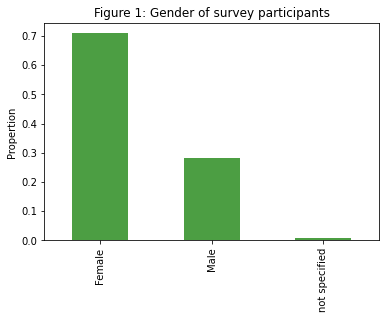

In [136]:
summary_table_modifed['Gender'].value_counts(normalize=True).plot(kind='bar', color = '#4c9e43')
plt.title('Figure 1: Gender of survey participants')
plt.ylabel('Propertion')
varT = summary_table_modifed['Gender'].fillna('Not specified').value_counts(normalize=True)*100
print(f'Percentage of Survey Participants by Gender: \n{round(varT,1)}')

Below is 2015 statistics from the Public Sector Commission (Western Australia):

In [137]:
varP = public_sector_stat.loc[0,['Female %','Male %']]
print(f'Percentage of male vs female in the WA public sector \n{varP}')

Percentage of male vs female in the WA public sector 
Female %    72.30%
Male %      27.70%
Name: 0, dtype: object



The proportion of male and female participants closely matches to the official statistics of the workfoce of WA public sector in 2015. In general, there are more female than male staff in the WA public sector - this is quite impressive when it is compared to NSW (66%, https://www.psc.nsw.gov.au/reports-and-data/workforce-profile/workforce-profile-reports/workforce-profile-report-2020/gender), Victoria (68%, https://vpsc.vic.gov.au/data-and-research/data-facts-visuals-state-of-the-sector/employee-work-status-gender-and-age/) and the federal government (59% in 2021, https://legacy.apsc.gov.au/employment-gender). Therefore, it is very likely that the data generated in the survey will closely reflect the situation of the entirely WA public section. Next I examine the salary range and the proportion of female in management/executive positions for female compared to male:

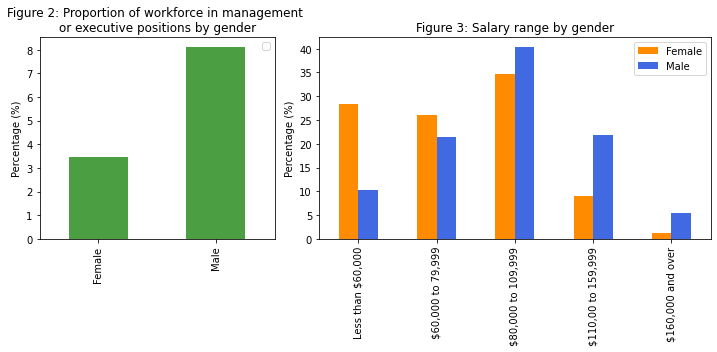

In [138]:
manage = summary_table_modifed.groupby('Gender')['ManagementTeam?'].value_counts(normalize=True)*100
manage = manage.loc[[('Female','Yes'),('Male', 'Yes')]].unstack(1)
#manage_num = summary_table_modifed.groupby('Gender')['ManagementTeam?'].value_counts()

salary = summary_table_modifed.groupby('Gender')['Salary'].value_counts(normalize=True, sort=False)*100
order = ["Less than $60,000", "$60,000 to 79,999", "$80,000 to 109,999",'$110,00 to 159,999','$160,000 and over']
salary = salary.to_frame().unstack(0).reindex(order)
salary = salary.loc[:,[('Salary','Female'),('Salary','Male')]]

#salary_num = summary_table_modifed.groupby('Gender')['Salary'].value_counts()

fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [1.5, 2.5]})
manage.plot(kind='bar', ax=ax2, color = '#4c9e43')
ax2.set_xlabel('')
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Figure 2: Proportion of workforce in management \nor executive positions by gender')
ax2.legend('')

salary.plot(kind='bar', ax=ax3, color=['darkorange','royalblue'])
ax3.set_xlabel('')
ax3.set_ylabel('Percentage (%)')
ax3.set_title('Figure 3: Salary range by gender')
ax3.legend(['Female','Male'])

plt.tight_layout()

In [139]:
summary_table_modifed.groupby('Gender')['ManagementTeam?'].value_counts().to_frame()

ManagementTeam?
Gender        ManagementTeam?                 
Female        No                          7810
              Yes                          279
Male          No                          2943
              Yes                          260
not specified No                           107
              Yes                            6

In [140]:
gen_sal = full_survey.loc[:,['D1','D8']].copy()
gen_sal['D8'] = pd.to_numeric(gen_sal['D8'], errors='coerce')
gen_sal['D1'] = pd.to_numeric(gen_sal['D1'], errors='coerce')
#Generate a table of mean, pairwise t-test, skewness and skewness test for salary
sal_male = gen_sal[gen_sal['D1'] == 1]['D8']
sal_female = gen_sal[gen_sal['D1'] == 2]['D8']
sal_ttest = st.ttest_ind(sal_male, sal_female, equal_var=False, nan_policy='omit')
sal_male_skewtest = st.skewtest(sal_male, nan_policy='omit')[1]
sal_female_skewtest = st.skewtest(sal_female, nan_policy='omit')[1]
sal_male_skew = st.skew(sal_male, nan_policy='omit')
sal_female_skew = st.skew(sal_female, nan_policy='omit')
pd.DataFrame([[sal_male.mean(),sal_male_skew,sal_male_skewtest,np.nan],[sal_female.mean(),sal_female_skew,sal_female_skewtest,sal_ttest[1]]],
            index=['Male','Female'],
            columns=['mean', 'skewness', 'skewness p-value', 'Student\'s t-test'])

,mean,skewness,skewness p-value,Student's t-test
Male,2.908234,-0.08053448299178835,6.345461e-02,NaN
Female,2.280319,0.22446952490319286,4.816193e-16,2.742336e-175


Of the survey participants, the figure for male and female in leadership role is fairly similar (see table/dataframe above), but there is actually less female by the proportion of gender population (Figure 2). These positions usually have higher salary, explaining why less women by proportion are earning more than \\$110,000 per year (Figure 3). The average annual income is significantly different betwween male and female, with a income bracket of close to \\$80,000-109,999 for men and \\$60,000-79,999 for women. In fact, **more women are in the 'entry level' positions** based on the fact that significantly more of them have less than \\$60,000 of annual income (based on significant positive skewness of female data) , approximately two times higher in proportion when compared to men. 

In [141]:
educate = round(summary_table_modifed.groupby(['Gender','Salary'])['Education'].value_counts(normalize=True)*100,0)
educate = educate.to_frame().unstack(0)
educate.columns = educate.columns.droplevel()
educate = educate.iloc[np.r_[11:13, 5:7, 8:10, 0:2, 3:5],0:2].reset_index().sort_values(['Education'])
educate

Gender,Salary,Education,Female,Male
0,"Less than $60,000",Primary/secondary school or technical/trade ce...,67.0,67.0
2,"$60,000 to 79,999",Primary/secondary school or technical/trade ce...,38.0,51.0
4,"$80,000 to 109,999",Primary/secondary school or technical/trade ce...,12.0,22.0
6,"$110,00 to 159,999",Primary/secondary school or technical/trade ce...,5.0,10.0
8,"$160,000 and over",Primary/secondary school or technical/trade ce...,3.0,2.0
1,"Less than $60,000",University qualification,32.0,32.0
3,"$60,000 to 79,999",University qualification,62.0,49.0
5,"$80,000 to 109,999",University qualification,88.0,78.0
7,"$110,00 to 159,999",University qualification,95.0,90.0
9,"$160,000 and over",University qualification,97.0,98.0


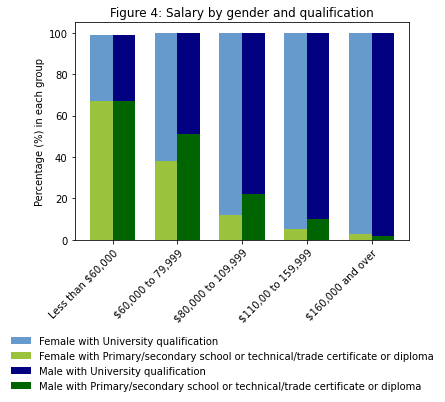

In [142]:
educate_wide = educate.set_index(['Salary', 'Education']).unstack(level=-1).iloc[[4,2,3,0,1]]
labels_educate = educate.loc[:,['Salary']]['Salary'].unique()

fig, ax = plt.subplots()

x = np.arange(len(labels_educate))
width = 0.35

ax.bar(x - width/2, (educate_wide[('Female','Primary/secondary school or technical/trade certificate or diploma')] + educate_wide[('Female','University qualification')]), width, label='Female with University qualification', color = "#6699cc")
ax.bar(x - width/2, (educate_wide[('Female','Primary/secondary school or technical/trade certificate or diploma')]), width,label='Female with Primary/secondary school or technical/trade certificate or diploma', color = "#9AC23D")
ax.bar(x + width/2, (educate_wide[('Male','Primary/secondary school or technical/trade certificate or diploma')] + educate_wide[('Male','University qualification')]), width, label='Male with University qualification', color = 'navy')
ax.bar(x + width/2, (educate_wide[('Male','Primary/secondary school or technical/trade certificate or diploma')]), width,label='Male with Primary/secondary school or technical/trade certificate or diploma', color = 'darkgreen')

ax.set_ylabel('Percentage (%) in each group')
ax.set_title('Figure 4: Salary by gender and qualification')
ax.set_xticks(x)
ax.set_xticklabels(labels_educate, rotation = 45, rotation_mode='anchor', ha = 'right')

ax.legend(bbox_to_anchor=(1.1, -0.4), frameon = False)

plt.show()

When I break down the above categories further into Qualification, it is more likely to find female with a University degree in higher income brackets than male counterpart. It therefore appears to me that **men have a better career opportunities than women** (assuming wage correlates with job levels), but I don't have extra data to help explain possible causes of such gender disparity, such as the total period of service (e.g. perhaps more women enter the workforce at entry to mid level around 2015?), contract type (fixed term or permanent) job level (e.g. level 1, 2, 3 etc) and type (administration, IT services, customer services etc) of individual employee.

Before moving on, I would like to have a quick check on the distribution of response to each survey question by gender:

Text(0.5, 1.0, 'Figure 5: Overview of survey response by gender')

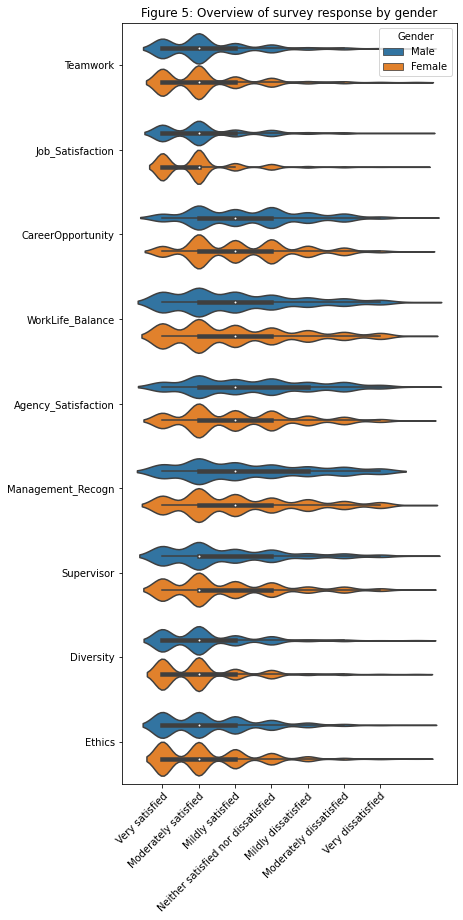

In [143]:
summary_violin = summary_table.iloc[:, np.r_[0,5:14]].melt(id_vars='Gender', var_name='SubQuestion', value_name='Response')

labels_AS_stat = np.array(list(agree_dict.items()))[:,1][0:7]

fig, ax5 = plt.subplots(figsize=(6,14))

sns.violinplot(x='Response', y='SubQuestion', hue = 'Gender', data=summary_violin,ax=ax5)
ax5.set_xticks(np.arange(1,8))
ax5.set_xticklabels(labels_AS_stat, rotation = 45, rotation_mode='anchor', ha = 'right')
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_title('Figure 5: Overview of survey response by gender')

Overall they appear to be fairly similar with very subtle differences, for example a higher proportion of women appears to be satisfied (very, moderately or mildly) with their job. These will be explored further in the below sections.

I have also created a simple stat table below for each super-category based on gender:

In [144]:
Table_male = summary_table[summary_table['Gender']=='Male'].iloc[:,np.r_[5:14]]
Table_female = summary_table[summary_table['Gender']=='Female'].iloc[:,np.r_[5:14]]

mean = np.empty(9,dtype='float64')
skewness = np.empty(9,dtype='float64')
skewtest = np.empty(9,dtype='float64')

for i, column in enumerate(Table_male):
    mean[i] = Table_male[column].mean()
    skewtest[i] = st.skewtest(Table_male[column], nan_policy='omit')[1]
    skewness[i] = st.skew(Table_male[column], nan_policy='omit')

Stat_summaryM = pd.DataFrame({'mean':mean,'skewness':skewness, 'skewtest': skewtest}, index=[summary_table.iloc[:,np.r_[5:14]].columns.values])
Stat_summaryM['Gender'] = 'Male'

for i, column in enumerate(Table_female):
    mean[i] = Table_female[column].mean()
    skewtest[i] = st.skewtest(Table_female[column], nan_policy='omit')[1]
    skewness[i] = st.skew(Table_female[column], nan_policy='omit')

Stat_summaryF = pd.DataFrame({'mean':mean,'skewness':skewness, 'skewtest': skewtest}, index=[summary_table.iloc[:,np.r_[5:14]].columns.values])
Stat_summaryF['Gender'] = 'Female'

Stat_summary = pd.concat([Stat_summaryM,Stat_summaryF])
Stat_summary

,mean,skewness,skewtest,Gender
Teamwork,2.364865,1.361562,1.000691e-129,Male
Job_Satisfaction,2.251252,1.274845,2.451080e-119,Male
CareerOpportunity,3.399250,0.386157,5.700315e-18,Male
WorkLife_Balance,3.054477,0.699116,1.148934e-48,Male
Agency_Satisfaction,3.432373,0.416632,2.008374e-20,Male
Management_Recogn,3.298125,0.551712,5.618909e-33,Male
Supervisor,2.770625,0.900789,1.438428e-72,Male
Diversity,2.263932,1.439338,5.604736e-140,Male
Ethics,2.428168,0.963622,5.172324e-80,Male
Teamwork,2.285554,1.516801,0.000000e+00,Female


#### Are female satisfied with their job and agency? <a class="anchor" id="section4-1"></a> [(Back to the top)](#top)

The very first question of the survey asked if the participant was satisfy with his/her job overall, and overwhelming >80% said they were either mildly, moderately or very satisfied (Figure 6):

Text(0.5, 1.0, 'Figure 6: Overall job satisfaction')

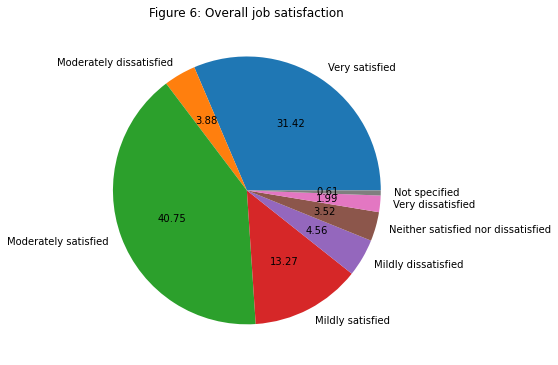

In [145]:
def get_response_key(name = 'column'):
    x = merged_key[merged_key['Question ID'] == name]
    y = dict(zip(x['Value'], x['Label']))
    return y

def get_question_key(name = 'column'):
    z = merged_key[merged_key['Question ID'] == name].iloc[0,3]
    return z

plt.figure(figsize=(6, 14))

for columni in full_survey.loc[:, ['A1a']]:
    response = get_response_key(columni)
    question = get_question_key(columni)
    columni_pie = full_survey[columni].fillna('Not specified').value_counts(sort=False, ascending=True, dropna=False).rename(response)
    
    columni_pie.plot(kind='pie', ylabel='',autopct='%.2f')

plt.title('Figure 6: Overall job satisfaction')

I then use the aggregated dataset to determine job satisfaction, and break it down into male and female (Figure 7):

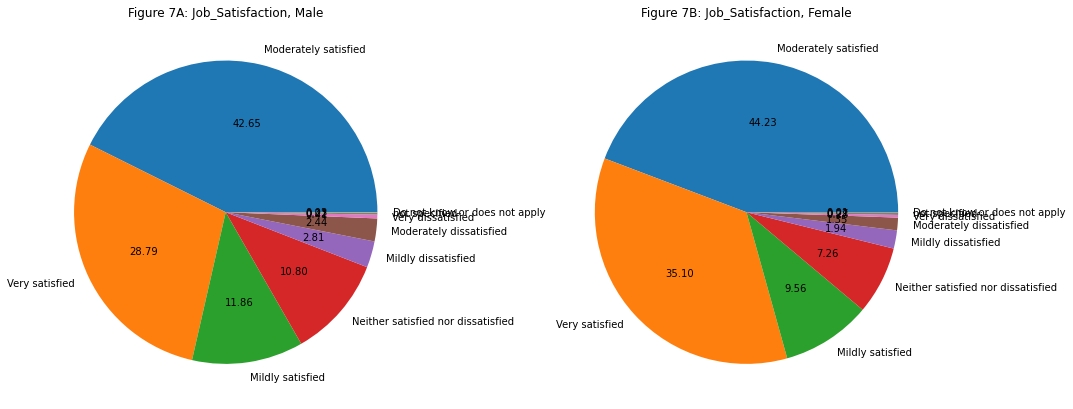

In [146]:
plt.figure(figsize=(15, 30))
counter = 1

for column in summary_table_modifed:
    if column != 'Job_Satisfaction':
        pass
    else:
        plt.subplot(1,2,counter) 
        summary_table_modifed[summary_table_modifed['Gender'] == 'Male'][column].value_counts().plot(kind='pie',autopct='%.2f')
        plt.title('Figure 7A: ' + column + ', Male')
        plt.ylabel('')
        counter+=1
        
        plt.subplot(1,2,counter) 
        summary_table_modifed[summary_table_modifed['Gender'] == 'Female'][column].value_counts().plot(kind='pie',autopct='%.2f')
        plt.title('Figure 7B: ' + column + ', Female')
        plt.ylabel('')
        counter+=1

plt.tight_layout()

The aggregated data appears to be in agreement with the outcome of question A1a. But it does not tell whether there is a difference in  job satisfaction men vs women. Therefore, I use numerical data to dig deeper into the data.

In [147]:
JS_male = summary_table[summary_table['Gender']=='Male']['Job_Satisfaction']
JS_female = summary_table[summary_table['Gender']=='Female']['Job_Satisfaction']
JS_ttest = st.ttest_ind(JS_male, JS_female, equal_var=False, nan_policy='omit')

pd.concat([Stat_summary.loc['Job_Satisfaction',:].reset_index().drop(columns='level_0'),
           pd.DataFrame({'t-test': [np.nan,JS_ttest[1]]})], axis=1).set_index('Gender')

,mean,skewness,skewtest,t-test
Gender,,,,
Male,2.251252,1.274845,2.451080e-119,NaN
Female,2.016859,1.539868,0.000000e+00,1.373033e-20


Note that the lower the Job Satisfaction value, the more satisfy the respondent is to his/her job. Surprisingly, women are slightly happier to their job overall then men. That's fine, but what about those who are not happy with their job?

In [148]:
JS_2way = summary_table[(summary_table['Job_Satisfaction'] >= 5) & (summary_table['Job_Satisfaction'] < 8)][['Gender','Education','Salary','Job_Satisfaction']]
JS_2way.anova(dv='Job_Satisfaction', between=['Gender', 'Education', 'Salary'],ss_type=3)

,Source,SS,DF,MS,F,p-unc,np2
0,Gender,0.047036,1.0,0.047036,0.116302,0.733241,0.000260
1,Education,3.033946,1.0,3.033946,7.501687,0.006410,0.016469
2,Salary,13.204770,4.0,3.301193,8.162476,0.000002,0.067929
3,Gender * Education,0.607906,1.0,0.607906,1.503099,0.220839,0.003344
4,Gender * Salary,0.425523,4.0,0.106381,0.263036,0.901617,0.002343
5,Education * Salary,13.629708,4.0,3.407427,8.425150,0.000001,0.069962
6,Gender * Education * Salary,2.716461,4.0,0.679115,1.679170,0.153697,0.014771
7,Residual,181.186961,448.0,0.404435,NaN,NaN,NaN


Education qualification and salary combined, but not gender, are the contributing factors to the low level of job satisfaction.

In [149]:
JS_2way[JS_2way['Gender']=='Female'][['Salary', 'Education']].value_counts()

Salary              Education                                                         
$80,000 to 109,999  University qualification                                              84
Less than $60,000   Primary/secondary school or technical/trade certificate or diploma    45
$60,000 to 79,999   University qualification                                              41
                    Primary/secondary school or technical/trade certificate or diploma    35
Less than $60,000   University qualification                                              30
$110,00 to 159,999  University qualification                                              27
$80,000 to 109,999  Primary/secondary school or technical/trade certificate or diploma    18
$160,000 and over   University qualification                                               4
$110,00 to 159,999  Primary/secondary school or technical/trade certificate or diploma     1
dtype: int64

What is surprising is that **female employees that are not very satisfy with their current job are in mid-level positions earning between \\$60,000 to 109,999 per year with a university degree**. I next explore if they are also unhappy with the agency they are working with. But first let's explore the overall satisfaction with the agency (Figure 8):

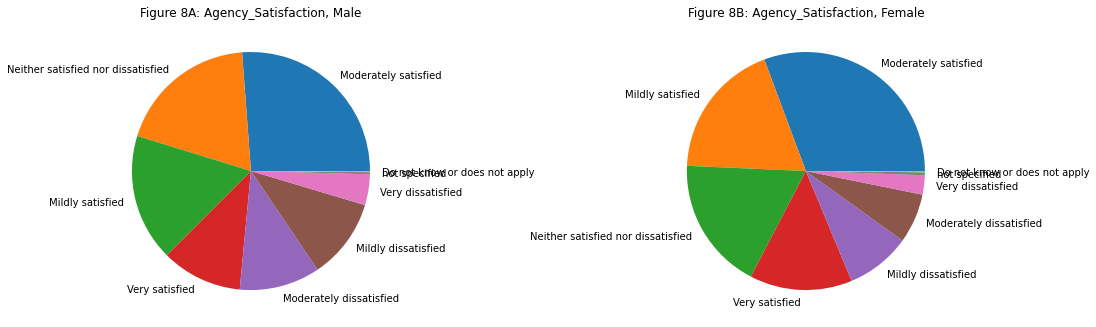

In [150]:
plt.figure(figsize=(15, 30))
counter = 1

for column in summary_table_modifed:
    if column != 'Agency_Satisfaction':
        pass
    else:
        plt.subplot(1,2,counter) 
        summary_table_modifed[summary_table_modifed['Gender'] == 'Male'][column].value_counts().plot(kind='pie')
        plt.title('Figure 8A: ' + column + ', Male')
        plt.ylabel('')
        counter+=1
        
        plt.subplot(1,2,counter) 
        summary_table_modifed[summary_table_modifed['Gender'] == 'Female'][column].value_counts().plot(kind='pie')
        plt.title('Figure 8B: ' + column + ', Female')
        plt.ylabel('')
        counter+=1

plt.tight_layout()

In [151]:
AS_male = summary_table[summary_table['Gender']=='Male']['Agency_Satisfaction']
AS_female = summary_table[summary_table['Gender']=='Female']['Agency_Satisfaction']
#Generate a table of mean, pairwise t-test, skewness and skewness test for agency satisfaction
AS_ttest = st.ttest_ind(AS_male, AS_female, equal_var=False, nan_policy='omit')
pd.concat([Stat_summary.loc['Agency_Satisfaction',:].reset_index().drop(columns='level_0'),
           pd.DataFrame({'t-test': [np.nan,AS_ttest[1]]})], axis=1).set_index('Gender')

,mean,skewness,skewtest,t-test
Gender,,,,
Male,3.432373,0.416632,2.008374e-20,NaN
Female,3.086757,0.656565,1.117299e-107,2.713990e-23


In [152]:
JSAS_female_ttest = st.ttest_ind(AS_female, JS_female, equal_var=False, nan_policy='omit')
print(f't-test comparing job satisfaction and agency satisfaction for female = {str(JSAS_female_ttest[1])}')
JSAS_female_ttest

t-test comparing job satisfaction and agency satisfaction for female = 0.0


Ttest_indResult(statistic=50.11587242180717, pvalue=0.0)

Compared to job satisfaction, less proportion of employees are mildly, moderately or very satisfy with their agency. In fact, more employees are neither satisfy nor dissatify with their agency. Again **women are more likely to be satisfied with their agency compared to men, but they are more likely to be happy with their position than their agency as a whole**. I found it somewhat concerning and could potentially have a negative impact to the moral of employees if things remained unchanged, which could reduce organisational productivity in the public sector in the long run. 

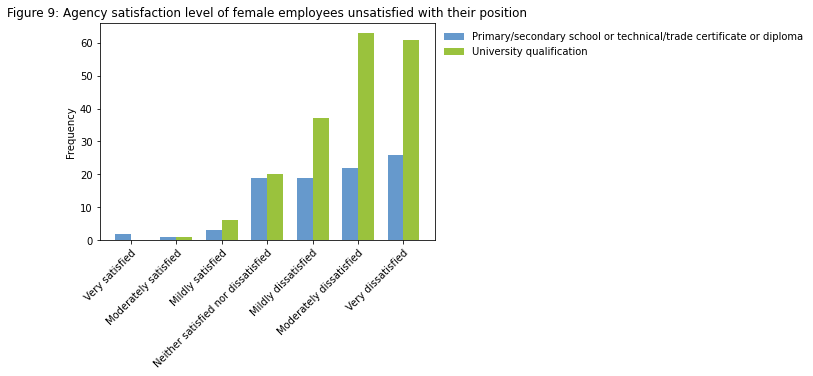

In [153]:
AS_stat = summary_table[(summary_table['Job_Satisfaction'] >= 5) & (summary_table['Job_Satisfaction'] < 8) & (summary_table['Gender'] == 'Female')]\
[['Education','Agency_Satisfaction']].value_counts().to_frame().reset_index().sort_values(by=['Education','Agency_Satisfaction']).replace({'Agency_Satisfaction':agree_dict})
AS_stat.rename(columns={0:'Frequency'}, inplace=True)
AS_stat_wide = AS_stat.set_index(['Education', 'Agency_Satisfaction']).unstack(level=0).iloc[[7,4,2,5,1,3,6],:].reset_index().fillna(0)
AS_stat_wide.columns = AS_stat_wide.columns.droplevel()
AS_stat_wide.rename(columns={'':'Satisfaction'}, inplace = True)

fig, ax9 = plt.subplots()

y = np.arange(len(labels_AS_stat))

ax9.bar(y - width/2, AS_stat_wide['Primary/secondary school or technical/trade certificate or diploma'], width, label='Primary/secondary school or technical/trade certificate or diploma', color = "#6699cc")
ax9.bar(y + width/2, AS_stat_wide['University qualification'], width, label='University qualification', color = "#9AC23D")

ax9.set_ylabel('Frequency')
ax9.set_title('Figure 9: Agency satisfaction level of female employees unsatisfied with their position')
ax9.set_xticks(y)
ax9.set_xticklabels(labels_AS_stat, rotation = 45, rotation_mode='anchor', ha = 'right')

ax9.legend(bbox_to_anchor=(1.0, 1.0), frameon = False)

plt.show()

In [154]:
AS_stat_num = summary_table[(summary_table['Job_Satisfaction'] >= 5) & (summary_table['Job_Satisfaction'] < 8) & (summary_table['Gender'] == 'Female')]\
[['Education','Agency_Satisfaction']]
AS_Uni = AS_stat_num[AS_stat_num['Education']=='University qualification']['Agency_Satisfaction']
AS_Others = AS_stat_num[AS_stat_num['Education']!='University qualification']['Agency_Satisfaction']

#Generate a table of mean, pairwise t-test, skewness and skewness test for agency satisfaction in the condition of female qualifications
AS_Uni_ttest = st.ttest_ind(AS_Uni, AS_Others, equal_var=False, nan_policy='omit')
AS_Uni_skewtest = st.skewtest(AS_Uni, nan_policy='omit')[1]
AS_Others_skewtest = st.skewtest(AS_Others, nan_policy='omit')[1]
AS_Uni_skew = st.skew(AS_Uni, nan_policy='omit')
AS_Others_skew = st.skew(AS_Others, nan_policy='omit')

pd.DataFrame([[AS_Uni.mean(),AS_Uni_skew,AS_Uni_skewtest,np.nan],[AS_Others.mean(),AS_Others_skew,AS_Others_skewtest,AS_Uni_ttest[1]]],
            index=['University degree','Without a university degree'],
            columns=['mean', 'skewness', 'skewness p-value', 'Student\'s t-test'])

,mean,skewness,skewness p-value,Student's t-test
University degree,5.797872,-0.790265,0.000040,NaN
Without a university degree,5.479167,-0.707529804925631,0.005495,0.061086


Consistently, female employees who not happy with their job are also dissatisfied with their agency regardless of their qualifications (Figure 9), although dissatisfaction level is likely to be higher for those with a university degree. Next, I would like to find out how many female employees who are satisfied with their role are not satisfied with their agency.

In [155]:
JobGAgencyB = summary_table[(summary_table['Job_Satisfaction'] < 4.0) & (summary_table['Agency_Satisfaction'] > 4.0) & (summary_table['Agency_Satisfaction'] < 8.0)]
JobAgencyF = JobGAgencyB[JobGAgencyB['Gender']=='Female'].shape[0]
TotalnumF = summary_table_modifed[summary_table_modifed['Gender']=='Female'].shape[0]
print(f'Of the {full_survey.shape[0]} survey participants, {JobGAgencyB.shape[0]} voiced some degree of dissatisfaction \
with their agency even though they expressed satisfaction with their role ({JobAgencyF} of which are women, of {TotalnumF} \
all female participants). This represents {round(JobGAgencyB.shape[0]/full_survey.shape[0]*100,0)}% \
of the total in the survey!')

Of the 11405 survey participants, 1356 voiced some degree of dissatisfaction with their agency even though they expressed satisfaction with their role (907 of which are women, of 8089 all female participants). This represents 12.0% of the total in the survey!


In [156]:
JobGAgencyB_2way = JobGAgencyB[['AgencySize','Gender','Agency_Satisfaction']]
JobGAgencyB_2way.anova(dv='Agency_Satisfaction', between=['AgencySize', 'Gender'],ss_type=2)

,Source,SS,DF,MS,F,p-unc,np2
0,AgencySize,0.429351,2.0,0.214675,0.524550,0.591943,0.000785
1,Gender,1.318269,1.0,1.318269,3.221134,0.072919,0.002405
2,AgencySize * Gender,0.290279,2.0,0.145140,0.354642,0.701490,0.000531
3,Residual,546.766289,1336.0,0.409256,NaN,NaN,NaN


However, employee dissatifaction with the agency, given that he/she is satisfied with his/her job, is unlikely to be influenced by agency size or gender (p-unc > 1%). Therefore other factors could be at play for such a significant number of dissatifaction. Next, I determine the future plans for these employees:

In [157]:
Quit_allfemale = pd.merge(Table_A4, summary_table[summary_table['Gender']=='Female'], how='inner', on=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize'])
UH_Quit_Female = Quit_allfemale[(Quit_allfemale['Job_Satisfaction'] >= 5) & (Quit_allfemale['Job_Satisfaction'] < 8) ]
Quit_allfemale[Quit_allfemale['Response'] == 'Yes'].drop_duplicates(subset=['ID']).shape[0]

2084

In [158]:
Quit_allfemale[Quit_allfemale['Response'] == 'Yes'].drop_duplicates(subset=['ID']).shape[0]/summary_table[summary_table['Gender']=='Female'].shape[0]*100

25.763382371121274

In [159]:
UH_Quit_Female.drop_duplicates(subset=['ID']).shape[0]

289

In [160]:
UH_LeaveAgency = UH_Quit_Female[UH_Quit_Female['Response'] == 'Yes']
len(UH_LeaveAgency.ID.unique())

171

In [161]:
Quit_allmale = pd.merge(Table_A4, summary_table[summary_table['Gender']=='Male'], how='inner', on=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize'])
UH_Quit_male = Quit_allmale[(Quit_allmale['Job_Satisfaction'] >= 5) & (Quit_allmale['Job_Satisfaction'] < 8) ]
Quit_allmale[Quit_allmale['Response'] == 'Yes'].drop_duplicates(subset=['ID']).shape[0]

895

In [162]:
Quit_allmale[Quit_allmale['Response'] == 'Yes'].drop_duplicates(subset=['ID']).shape[0]/summary_table[summary_table['Gender']=='Male'].shape[0]*100

27.942553855760227

In [163]:
UH_Quit_male.drop_duplicates(subset=['ID']).shape[0]

181

In [164]:
len(UH_Quit_male[UH_Quit_male['Response'] == 'Yes']['ID'].unique())

106

2084 of women surveyed (26%) would like to leave their role within two years. Of the 289 female employees who are unsatisfied with their job, 171 plan to quit their job.

Similarly 895 of men surveyed (27%) would like to leave their role within two years. Of the 181 male employees who are unsatisfied with their job, 106 plan to quit their job.

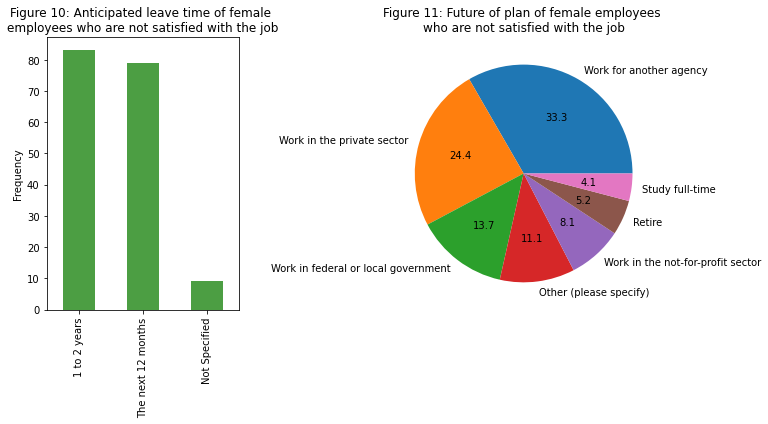

In [165]:
fig, (ax10, ax11) = plt.subplots(1, 2, figsize=(11,6), gridspec_kw={'width_ratios': [1, 2]})

UH_LeaveAgency.drop_duplicates(subset = ['ID','LeaveTime'])['LeaveTime'].value_counts().plot(kind='bar', color = '#4c9e43', ax=ax10)
ax10.set_title('Figure 10: Anticipated leave time of female \nemployees who are not satisfied with the job')
ax10.set_ylabel('Frequency')

UH_LeaveAgency['FuturePlan'].value_counts().plot(kind='pie', autopct='%.1f', ax=ax11)
ax11.set_title('Figure 11: Future of plan of female employees \nwho are not satisfied with the job')
ax11.set_ylabel('')

plt.tight_layout()

For female who are not satified with their job, about 46% indicate that they would leave in the next 12 months (Figure 10). Overall, 46% would prefer to remain in the public sector either at the federal, state or local level (Figure 11). Only 4% would continue studying full-time, and interestingly seven of which already have a university qualification (see below). 

In [166]:
UH_LeaveAgency[(UH_LeaveAgency['FuturePlan'] == 'Study full-time')&(UH_LeaveAgency['Education'] == 'University qualification')]

,ID,Gender,Education,Salary,ManagementTeam?,AgencySize,LeaveTime,FuturePlan,Response,Teamwork,Job_Satisfaction,CareerOpportunity,WorkLife_Balance,Agency_Satisfaction,Management_Recogn,Supervisor,Diversity,Ethics
18561,3517,Female,University qualification,"$80,000 to 109,999",No,More than 1000 employees,1 to 2 years,Study full-time,Yes,1.0,5.0,3.0,5.0,4.0,4.0,2.0,4.0,2.0
20283,3838,Female,University qualification,"$80,000 to 109,999",No,More than 1000 employees,1 to 2 years,Study full-time,Yes,4.0,5.0,6.0,7.0,7.0,7.0,6.0,6.0,4.0
21774,4105,Female,University qualification,"Less than $60,000",No,More than 1000 employees,The next 12 months,Study full-time,Yes,2.0,5.0,6.0,5.0,5.0,2.0,5.0,4.0,3.0
35060,6523,Female,University qualification,"$60,000 to 79,999",No,More than 1000 employees,1 to 2 years,Study full-time,Yes,5.0,6.0,6.0,7.0,6.0,6.0,2.0,6.0,5.0
35613,6616,Female,University qualification,"$80,000 to 109,999",No,More than 1000 employees,The next 12 months,Study full-time,Yes,4.0,5.0,4.0,6.0,6.0,6.0,4.0,3.0,3.0
38420,7124,Female,University qualification,"Less than $60,000",No,More than 1000 employees,1 to 2 years,Study full-time,Yes,4.0,5.0,7.0,7.0,6.0,6.0,6.0,5.0,4.0
49004,9472,Female,University qualification,"Less than $60,000",No,200 to 1000 employees,The next 12 months,Study full-time,Yes,6.0,7.0,7.0,5.0,7.0,7.0,6.0,7.0,6.0


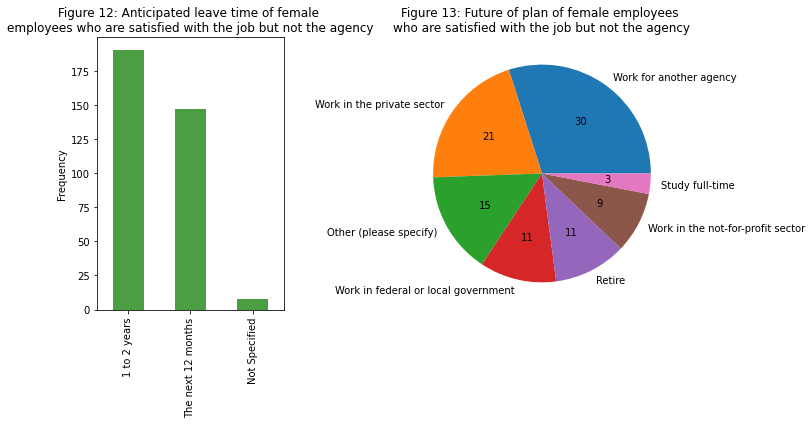

In [167]:
H_Total = Quit_allfemale[(Quit_allfemale['Job_Satisfaction'] < 4) & (Quit_allfemale['Agency_Satisfaction'] > 4.0)]\
[['ID','Education','Agency_Satisfaction']]
H_Total = pd.merge(Table_A4, H_Total, how='inner', on='ID')
H_LeaveAgency = H_Total[H_Total['Response'] == 'Yes']

fig, (ax12, ax13) = plt.subplots(1, 2, figsize=(11,6), gridspec_kw={'width_ratios': [1, 2]})

H_LeaveAgency.drop_duplicates(subset = ['ID','LeaveTime'])['LeaveTime'].value_counts().plot(kind='bar', color = '#4c9e43', ax=ax12)
ax12.set_title('Figure 12: Anticipated leave time of female \nemployees who are satisfied with the job but not the agency')
ax12.set_ylabel('Frequency')

H_LeaveAgency['FuturePlan'].value_counts().plot(kind='pie', autopct='%.0f', ax=ax13)
ax13.set_title('Figure 13: Future of plan of female employees \nwho are satisfied with the job but not the agency')
ax13.set_ylabel('')

plt.tight_layout()

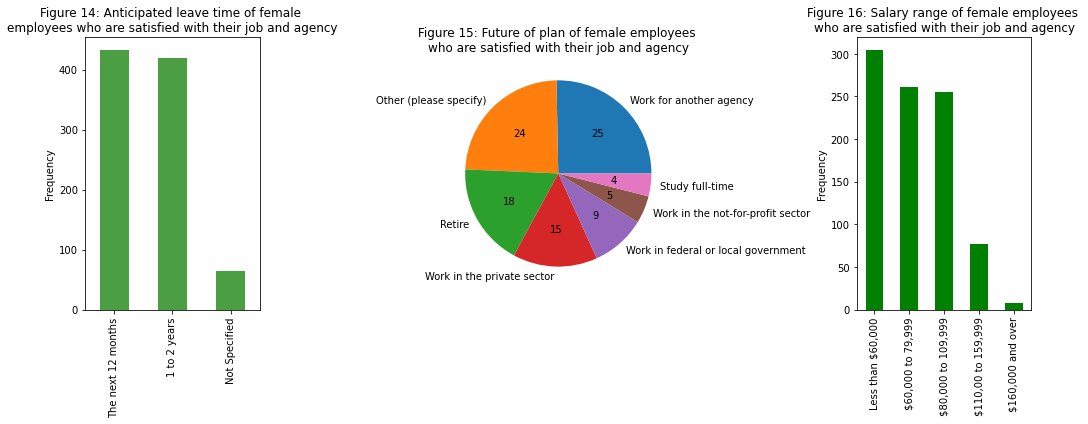

In [168]:
HH_Total = Quit_allfemale[(Quit_allfemale['Job_Satisfaction'] < 4) & (Quit_allfemale['Agency_Satisfaction'] < 4.0)]\
[['ID','Education','Agency_Satisfaction']]
HH_Total = pd.merge(Table_A4, HH_Total, how='inner', on='ID')
HH_LeaveAgency = HH_Total[HH_Total['Response'] == 'Yes']

fig, (ax14, ax15, ax16) = plt.subplots(1, 3, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 2, 1.5]})

HH_LeaveAgency.drop_duplicates(subset = ['ID','LeaveTime'])['LeaveTime'].value_counts().plot(kind='bar', color = '#4c9e43', ax=ax14)
ax14.set_title('Figure 14: Anticipated leave time of female \nemployees who are satisfied with their job and agency')
ax14.set_ylabel('Frequency')

HH_LeaveAgency['FuturePlan'].value_counts().plot(kind='pie', autopct='%.0f', ax=ax15)
ax15.set_title('Figure 15: Future of plan of female employees \nwho are satisfied with their job and agency')
ax15.set_ylabel('')

HH_LeaveAgency.drop_duplicates(subset = ['ID','LeaveTime'])['Salary'].value_counts().plot(kind='bar', color='green',ax=ax16)
ax16.set_title('Figure 16: Salary range of female employees \nwho are satisfied with their job and agency')
ax16.set_ylabel('Frequency')

plt.tight_layout()

I did a similar analysis for female employees who are satisfied with their job but not the agency. More than 50% would leave in 1-2 years (Figure 12). Overall, 60% would like to remain in the public sector but at a different agency or at different government level (Figure 13). Curiously, more female employees who are satisfied both with their job and agency are planning to leave compared to other comparisons (Figure 14). Although there is a good number of them planning to retire (Figure 15), it is not clear why others are not planning to remain in the same agency. One possible reason is that they are seeking to increase their salary or to receive a promotion by moving to another workplace (Figure 16), but further information, particularly the nature of their contract and the number of new positions and turnover rate per agency, will be necessary for determining the cause of their movement to other areas within the govenment or to private sector.

**In summary, it appears that most of survey participants are satisfied with their role, but less so with their agency. Women are also earning less than even though they are more likely to hold a higher education qualification(s). They are also more likely to be more dissatisfied with their agency than those with only certificate/diploma from high school or technical training colleges. Almost half of female employees are unsatisfied with their agency or job would like to continue working in the public sector but at another agency or at a different government level.**

#### Are highly qualified women disadvantaged in the public sector due to the lack of career progression? <a class="anchor" id="section4-2"></a> [(Back to the top)](#top)

One way to increase female representation in the management/leadership team in the near future is to increase promotion opportunities in the agency as well as to retain talented women. Here, I examine the potential factor that impede career advancement of women. First let's look at overall satisfaction to career opportunities in the public sector:

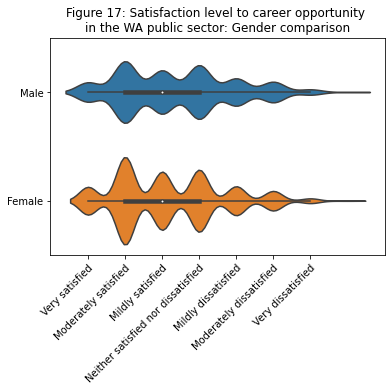

In [169]:
fig, ax16 = plt.subplots()

sns.violinplot(x='CareerOpportunity', y='Gender', data=summary_table, ax=ax16)
ax16.set_xticks(np.arange(1,8))
ax16.set_xticklabels(labels_AS_stat, rotation = 45, rotation_mode='anchor', ha = 'right')
ax16.set_xlabel('')
ax16.set_ylabel('')
ax16.set_title('Figure 17: Satisfaction level to career opportunity \nin the WA public sector: Gender comparison')


plt.show()

In [170]:
CO_male = summary_table_modifed[summary_table_modifed['Gender'] == 'Male']['CareerOpportunity'].value_counts(normalize=True)
CO_female = summary_table_modifed[summary_table_modifed['Gender'] == 'Female']['CareerOpportunity'].value_counts(normalize=True)

CO_male = CO_male.to_frame().iloc[[4,0,1,2,3,5,6],:]
CO_female = CO_female.to_frame().iloc[[3,0,1,2,4,5,6],:]

CO_male

,CareerOpportunity
Moderately dissatisfied,0.088979
Moderately satisfied,0.266313
Neither satisfied nor dissatisfied,0.231970
Mildly satisfied,0.186388
Mildly dissatisfied,0.117702
Very satisfied,0.083672
Very dissatisfied,0.023416


In [171]:
CO_female

,CareerOpportunity
Mildly dissatisfied,0.100012
Moderately satisfied,0.303128
Neither satisfied nor dissatisfied,0.214489
Mildly satisfied,0.200890
Very satisfied,0.095809
Moderately dissatisfied,0.067623
Very dissatisfied,0.016566


In [172]:
CO_male_num = summary_table[summary_table['Gender']=='Male']['CareerOpportunity']
CO_female_num = summary_table[summary_table['Gender']=='Female']['CareerOpportunity']
CO_ttest = st.ttest_ind(CO_male_num, CO_female_num, equal_var=False, nan_policy='omit')

pd.concat([Stat_summary.loc['CareerOpportunity',:].reset_index().drop(columns='level_0'),
           pd.DataFrame({'t-test': [np.nan,CO_ttest[1]]})], axis=1).set_index('Gender')

,mean,skewness,skewtest,t-test
Gender,,,,
Male,3.39925,0.386157,5.700315e-18,NaN
Female,3.19275,0.527298,2.899253e-74,7.102017e-11


Overall, women are slightly more satisfied with career opportunity in the WA public sector (Figure 5 and 17, compare mean career opportunity above). In any cases, ~14% of women are either mildly, moderately or very dissatified with opportunitiy for career advancement (This figure is similar for men). 

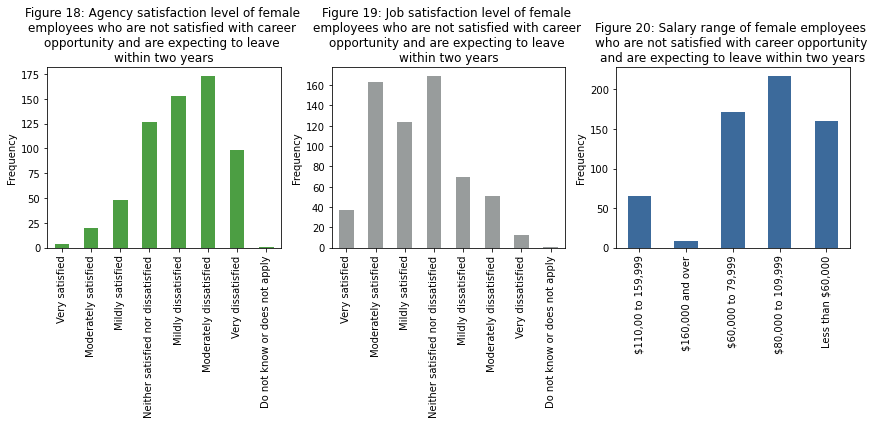

In [173]:
CO_female_Quit = pd.merge(Table_A4, summary_table[((summary_table['Gender'] == 'Female'))], how='inner', on=['ID','Gender','Education','AgencySize','Salary','ManagementTeam?'])
CO_female_Quit = CO_female_Quit[CO_female_Quit['Response']=='Yes'].drop_duplicates(subset=['ID','Education'])

fig, (ax18, ax19, ax20) = plt.subplots(1, 3, figsize=(12,6))

CO_female_Quit[(CO_female_Quit['CareerOpportunity']>=5) & (CO_female_Quit['CareerOpportunity']<8)]\
['Agency_Satisfaction'].value_counts().sort_index().rename(index=agree_dict).plot(kind='bar', color = '#4c9e43', ax=ax18)
ax18.set_title('Figure 18: Agency satisfaction level of female \nemployees who are not satisfied with career \nopportunity and are expecting to leave \nwithin two years')
ax18.set_ylabel('Frequency')

CO_female_Quit[(CO_female_Quit['CareerOpportunity']>=5) & (CO_female_Quit['CareerOpportunity']<8)]\
['Job_Satisfaction'].value_counts().sort_index().rename(index=agree_dict).plot(kind='bar', color = '#989c9c', ax=ax19)
ax19.set_title('Figure 19: Job satisfaction level of female \nemployees who are not satisfied with career \nopportunity and are expecting to leave \nwithin two years')
ax19.set_ylabel('Frequency')

CO_female_Quit[(CO_female_Quit['CareerOpportunity']>=5) & (CO_female_Quit['CareerOpportunity']<8)]\
['Salary'].value_counts().sort_index().plot(kind='bar', color = '#3c6a9b', ax=ax20)
ax20.set_title('Figure 20: Salary range of female employees \nwho are not satisfied with career opportunity \nand are expecting to leave within two years')
ax20.set_ylabel('Frequency')

plt.tight_layout()

In [174]:
CO_female_Quit[(CO_female_Quit['CareerOpportunity']>=5) & (CO_female_Quit['CareerOpportunity']<8)]\
['Education'].value_counts(normalize=True)*100

University qualification                                              70.032051
Primary/secondary school or technical/trade certificate or diploma    29.967949
Name: Education, dtype: float64

In [175]:
CO_male_Quit = pd.merge(Table_A4, summary_table[((summary_table['Gender'] == 'Male'))], how='inner', on=['ID','Gender','Education','AgencySize','Salary','ManagementTeam?'])
CO_male_Quit = CO_male_Quit[CO_male_Quit['Response']=='Yes'].drop_duplicates(subset=['ID','Education'])
CO_male_Quit[(CO_male_Quit['CareerOpportunity']>=5) & (CO_male_Quit['CareerOpportunity']<8)]\
['Education'].value_counts(normalize=True)*100

University qualification                                              76.315789
Primary/secondary school or technical/trade certificate or diploma    23.684211
Name: Education, dtype: float64

For women who said they are not satisfied with career opportunity and are prepared to move on within 2 years, they most likely are not satisfied with the agency (Figure 18) but are satisfied with their job (Figure 19). Also they are very likely to be earning less than \\$110,000 per year (Figure 20) and hold a university qualification. For comparison, 75\% men who are not satisfied with career opportunity and are prepared to move on within 2 years usually have a university degree. 

I then examine if the action/performance of the supervisor or recognition from the management could influence female employee's perception to career opportunities within the public sector.

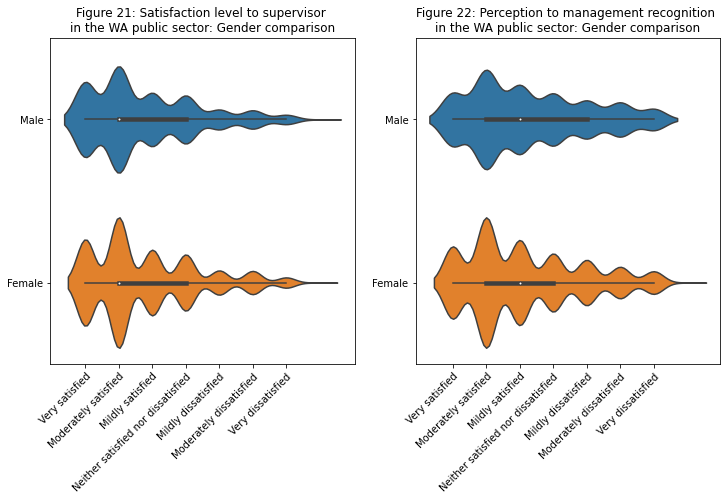

In [176]:
SPV_male = summary_table_modifed[summary_table_modifed['Gender'] == 'Male']['Supervisor'].value_counts(normalize=True)*100
SPV_female = summary_table_modifed[summary_table_modifed['Gender'] == 'Female']['Supervisor'].value_counts(normalize=True)*100

SPV_male = SPV_male.to_frame().iloc[[1,0,2,3,4,5,6],:]
SPV_female = SPV_female = SPV_female.to_frame().iloc[[1,0,2,3,4,5,6],:]

fig, (ax21, ax22) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.violinplot(x='Supervisor', y='Gender', data=summary_table, ax=ax21)
ax21.set_xticks(np.arange(1,8))
ax21.set_xticklabels(labels_AS_stat, rotation = 45, rotation_mode='anchor', ha = 'right')
ax21.set_xlabel('')
ax21.set_ylabel('')
ax21.set_title('Figure 21: Satisfaction level to supervisor \nin the WA public sector: Gender comparison')

sns.violinplot(x='Management_Recogn', y='Gender', data=summary_table, ax=ax22)
ax22.set_xticks(np.arange(1,8))
ax22.set_xticklabels(labels_AS_stat, rotation = 45, rotation_mode='anchor', ha = 'right')
ax22.set_xlabel('')
ax22.set_ylabel('')
ax22.set_title('Figure 22: Perception to management recognition \nin the WA public sector: Gender comparison')

plt.show()

In [177]:
SPV_male_num = summary_table[summary_table['Gender']=='Male']['Supervisor']
SPV_female_num = summary_table[summary_table['Gender']=='Female']['Supervisor']
SPV_ttest = st.ttest_ind(SPV_male_num, SPV_female_num, equal_var=False, nan_policy='omit')

pd.concat([Stat_summary.loc['Supervisor',:].reset_index().drop(columns='level_0'),
           pd.DataFrame({'t-test': [np.nan,SPV_ttest[1]]})], axis=1).set_index('Gender')

,mean,skewness,skewtest,t-test
Gender,,,,
Male,2.770625,0.900789,1.438428e-72,NaN
Female,2.782189,0.897317,1.218340e-178,0.727604


In [178]:
MR_male_num = summary_table[summary_table['Gender']=='Male']['Management_Recogn']
MR_female = summary_table[summary_table['Gender']=='Female']['Management_Recogn']
MR_ttest = st.ttest_ind(MR_male_num, MR_female, equal_var=False, nan_policy='omit')

pd.concat([Stat_summary.loc['Management_Recogn',:].reset_index().drop(columns='level_0'),
           pd.DataFrame({'t-test': [np.nan,MR_ttest[1]]})], axis=1).set_index('Gender')

,mean,skewness,skewtest,t-test
Gender,,,,
Male,3.298125,0.551712,5.618909e-33,NaN
Female,3.134199,0.679827,1.686931e-114,0.000007


There is no difference in the satisfaction level to employee's supervisor for female and male (Figure 5 and 21, compare mean career opportunity above). However, women are slightly more satisfied to the recognition received from the management team than men (Figure 5 and 22, compare mean career opportunity above).

Specifically, what about women who are not satisfied with their position?

Text(0, 0.5, 'Frequency')

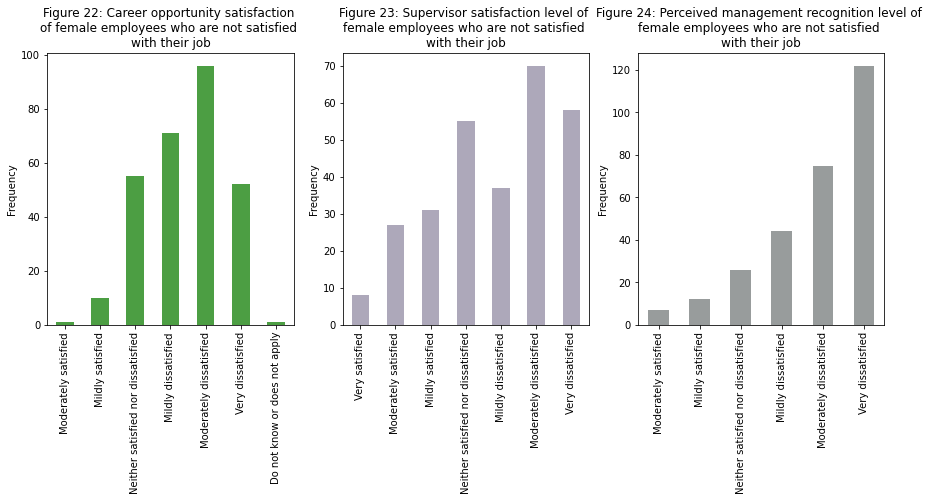

In [179]:
MRS = summary_table[(summary_table['Gender']=='Female')&(summary_table['Job_Satisfaction']>=5)&\
                    (summary_table['Job_Satisfaction']<8)&(summary_table['Supervisor']<8)&\
                    (summary_table['Management_Recogn']<8)][['ID','CareerOpportunity','Supervisor','Management_Recogn','Education']]

fig, (ax22, ax23, ax24) = plt.subplots(1, 3, figsize=(15,5))

MRS['CareerOpportunity'].value_counts().sort_index().rename(index=agree_dict).plot(kind='bar', color = '#4c9e43', ax=ax22)
ax22.set_title('Figure 22: Career opportunity satisfaction \nof female employees who are not satisfied \nwith their job')
ax22.set_ylabel('Frequency')

MRS['Supervisor'].value_counts().sort_index().rename(index=agree_dict).plot(kind='bar', color = '#ada8ba', ax=ax23)
ax23.set_title('Figure 23: Supervisor satisfaction level of \nfemale employees who are not satisfied \nwith their job')
ax23.set_ylabel('Frequency')

MRS['Management_Recogn'].value_counts().sort_index().rename(index=agree_dict).plot(kind='bar', color = '#989c9c', ax=ax24)
ax24.set_title('Figure 24: Perceived management recognition level of \nfemale employees who are not satisfied \nwith their job')
ax24.set_ylabel('Frequency')


In [180]:
print(f'Female who are not satisfied with their job: \nMean management recognition = {MRS.Management_Recogn.mean()}\n\
Mean supervisor satisfaction = {MRS.Supervisor.mean()}')

Female who are not satisfied with their job: 
Mean management recognition = 5.8671328671328675
Mean supervisor satisfaction = 4.846153846153846


In [181]:
MRS['Education'].value_counts(normalize=True)*100

University qualification                                              65.492958
Primary/secondary school or technical/trade certificate or diploma    34.507042
Name: Education, dtype: float64

Female respondents who are not satisfied with their job are somewhat dissatified with their carrer opportunitiy as well as action/advise from their supervisor (Figure 23 and 24). Again, they are more likely holding a university degree (65%). More strikingly, more than 67% are moderately or very dissatisfied with the way the management team recognises their job achievement (Figure 25).

In [182]:
#see figure 25-27 below
super_meet = pd.merge(Table_B9, summary_table, on='ID')
super_meet_cat = super_meet.groupby('Gender')['How often do you meet with your immediate supervisor informally?'].value_counts(normalize=True, sort=False)*100
super_order = ["Fortnightly or more frequently", "Monthly",'Six monthly','Annually','Never','Unsure','not specified']
super_meet_cat = super_meet_cat.to_frame().unstack(0).reindex(super_order)
super_meet_cat = super_meet_cat.loc[:,[('How often do you meet with your immediate supervisor informally?','Female'),('How often do you meet with your immediate supervisor informally?','Male')]]

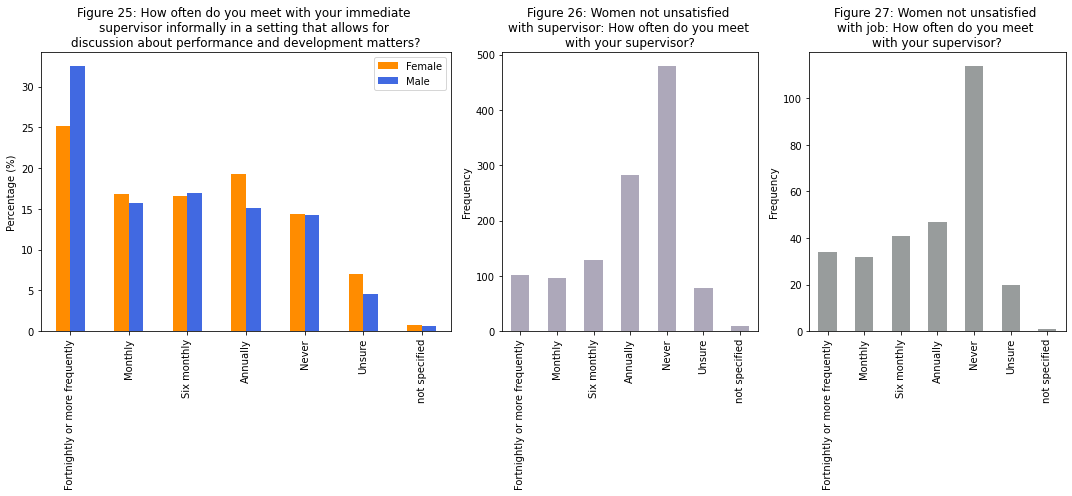

In [183]:
fig, (ax25, ax26, ax27) = plt.subplots(1, 3, figsize=(13,6), gridspec_kw={'width_ratios': [1.6, 1, 1]})

super_meet_cat.plot(kind='bar', figsize=(15,7), color = ['darkorange','royalblue'], ax=ax25)
ax25.set_xlabel('')
ax25.set_ylabel('Percentage (%)')
ax25.set_title('Figure 25: How often do you meet with your immediate \nsupervisor informally in a setting that allows for \ndiscussion about performance and development matters?')
ax25.legend(['Female','Male'])

super_meet[(super_meet['Supervisor']>=5)&(super_meet['Supervisor']<8)&(super_meet['Gender'] == 'Female')]\
['How often do you meet with your immediate supervisor informally?'].value_counts().reindex(super_order).plot(kind='bar',  color = '#ada8ba', ax=ax26)
ax26.set_ylabel('Frequency')
ax26.set_title('Figure 26: Women not unsatisfied \nwith supervisor: How often do you meet \nwith your supervisor?')

super_meet[(super_meet['Job_Satisfaction']>=5)&(super_meet['Job_Satisfaction']<8)&(super_meet['Gender'] == 'Female')]\
['How often do you meet with your immediate supervisor informally?'].value_counts().reindex(super_order).plot(kind='bar', color = '#989c9c', ax=ax27)
ax27.set_ylabel('Frequency')
ax27.set_title('Figure 27: Women not unsatisfied \nwith job: How often do you meet \nwith your supervisor?')


plt.tight_layout()


In [184]:
super_meet_num = pd.merge(Table_B9_num, summary_table[['ID','Gender']], on='ID')
super_meet_num['B9'] = pd.to_numeric(super_meet_num['B9'], errors='coerce')
super_meet_num_male = super_meet_num[super_meet_num['Gender'] == 'Male']['B9']
super_meet_num_female = super_meet_num[super_meet_num['Gender'] == 'Female']['B9']

#Generate a table of mean, pairwise t-test, skewness and skewness test for supervisor meeting interval 
super_meet_ttest = st.ttest_ind(super_meet_num_male, super_meet_num_female, equal_var=False, nan_policy='omit')
super_meet_male_skewtest = st.skewtest(super_meet_num_male, nan_policy='omit')[1]
super_meet_female_skewtest = st.skewtest(super_meet_num_female, nan_policy='omit')[1]
super_meet_male_skew = st.skew(super_meet_num_male, nan_policy='omit')
super_meet_female_skew = st.skew(super_meet_num_female, nan_policy='omit')

pd.DataFrame([[super_meet_num_male.mean(),super_meet_male_skew,super_meet_male_skewtest,np.nan],
              [super_meet_num_female.mean(),super_meet_female_skew,AS_Others_skewtest,super_meet_ttest[1]]],
            index=['Male','Female'],
            columns=['mean', 'skewness', 'skewness p-value', 'Student\'s t-test'])

,mean,skewness,skewness p-value,Student's t-test
Male,2.764225,0.38916997444238466,4.158213e-18,NaN
Female,3.019816,0.2169691381173499,5.495034e-03,3.140958e-14


Based on the survey, it seems that less than 45% of employees have regular meeting with their immediate supervisor (i.e. less than four-week interval) in the WA public sector. **On average, men meet with their supervisor significantly more regularly with their supervisor than female employees (Figure 25, table above).** Women who are not satistified with their supervisor and/or job are more likely to never have an informal meeting with their supervisor or even aware that such meeting exists (Figure 26 and 27).

In [185]:
MRS_meetings = pd.merge(Table_B8, MRS, on='ID', how='inner')
MRS_meetings = MRS_meetings[MRS_meetings['Response'] == 'Yes']
MRS_meetings['Performance_review'].value_counts(normalize=True)

Yes                                                        0.753333
No                                                         0.208333
Have been employed by my agency for less than 12 months    0.035000
Not Specified                                              0.003333
Name: Performance_review, dtype: float64

In [186]:
#see figure 28 below
MRS_meetings_female = MRS_meetings['What_was_Discussed'].value_counts(normalize=True).to_frame().rename(columns={'What_was_Discussed':'Female dissatisfied with job'})

CO_female_Quit_discuss = pd.merge(Table_B8, CO_female_Quit, on=['ID','Gender','Education','AgencySize','Salary','ManagementTeam?'], how='inner')
CO_female_Quit_discuss = CO_female_Quit_discuss[CO_female_Quit_discuss['Response_x'] == 'Yes']
CO_female_Quit_discuss_all = CO_female_Quit_discuss['What_was_Discussed'].value_counts(normalize=True).to_frame().rename(columns={'What_was_Discussed':'Female planning to quit within two years'})

summary_table_discuss = pd.merge(Table_B8, summary_table, on=['ID','Gender','Education','AgencySize','Salary','ManagementTeam?'], how='inner')
summary_table_discuss = summary_table_discuss[summary_table_discuss['Response'] == 'Yes']
summary_table_discuss_all = summary_table_discuss['What_was_Discussed'].value_counts(normalize=True).to_frame().rename(columns={'What_was_Discussed':'All survey participants'})

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


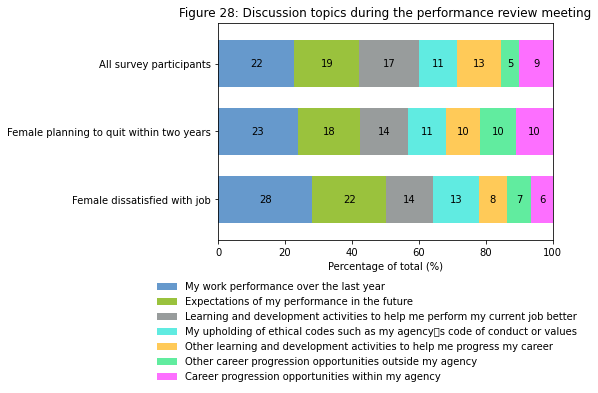

In [187]:
discuss = pd.merge(MRS_meetings_female, CO_female_Quit_discuss_all, left_index=True, right_index=True)
discuss = pd.merge(discuss, summary_table_discuss_all, left_index=True, right_index=True)
discuss_transpose = discuss.transpose()*100

fig, ax28 = plt.subplots()
discuss_transpose.plot(kind='barh', stacked=True, ax=ax28, 
                       color=['#6699cc', '#9AC23D', '#989c9c', '#60ebe1', '#ffca58', '#61ec9f', '#fd6fff'],
                      width = 0.7)
ax28.set_title('Figure 28: Discussion topics during the performance review meeting')
ax28.set_xlabel('Percentage of total (%)')
ax28.legend(bbox_to_anchor=(1.1, -0.15),frameon=False)
ax28.set_xlim(0, 100)

for c in ax28.containers:
    # if the segment is 0, empty them
    labels = [np.int64(v.get_width()) if np.int64(v.get_width()) > 0 else '' for v in c]
    ax28.bar_label(c, labels=labels, label_type='center')


Only 75% of women who are unsatisfied with their job have had a performance review meeting in the past 12 months. When I look at what usually are discussed during these meetings, **a significant proportion (close to 80%) is focused on performance and organisational matter rather than on career progression**. This is way higher than the other categories compared in Figure 25 above, i.e 'All survey respondents' and 'Female planning to quit within two years' (~60-70%). It is not known whether the interactions during these meetings are positive or negative, but what is clear is that **there seems to be a lack of discussion on career development during a meeting, or there is not a lot information available within the public sector on career opportunities and development**. 

Perhaps an informal meeting with the immediate supervisor should also take place at least monthly to discuss job progress. Also, there should either be an introduction of a guideline/checklist for performace review which includes career development for entry level employees, an additional meeting/informal meeting separate from the performance review, and/or an internal information portal where employees can access information relating to career development, in the hope to increase retention of female employees and ultimately increase female representation in the management and leadership team in the future.  

#### Perception to work and life balance of female employees in the WA public sector <a class="anchor" id="section4-3"></a> [(Back to the top)](#top)

Even today, many women leave job after having kids as they find balancing life and working difficult to manage (https://www.abc.net.au/everyday/quitting-your-job-after-kids/100307880). In this section I will attempt to examine this aspect in the WA public sector in 2015 based on the three questions in the survey.

In [188]:
WLB_poor = summary_table[(summary_table['WorkLife_Balance'] >= 5)&(summary_table['WorkLife_Balance'] < 8)]
WLB_poor['Gender'].value_counts()/summary_table['Gender'].value_counts()*100

Female    20.707133
Male      20.231033
Name: Gender, dtype: float64

The number of women who feel work and life balance at dissatisfactory leaving are leaving their position = 606


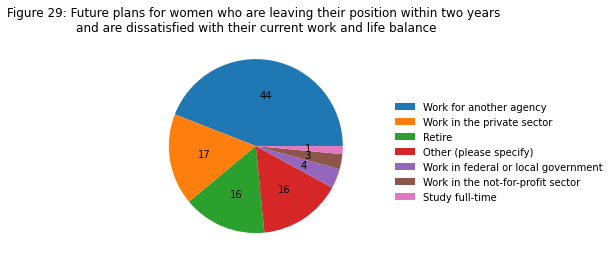

In [189]:
WLB_poor_female = WLB_poor[WLB_poor['Gender']=='Female']
WLB_poor_female_quit = pd.merge(Table_A4,WLB_poor_female,on=['ID','Gender','Education','Salary','ManagementTeam?','AgencySize'], how='inner')
WLB_poor_female_quit = WLB_poor_female_quit[WLB_poor_female_quit['Response']=='Yes']

fig, ax29 = plt.subplots()
WLB_poor_female_quit.drop_duplicates(subset='ID')['FuturePlan'].value_counts().plot(kind='pie',autopct='%.0f',labels=['','','','','','',''],)
ax29.set_title('Figure 29: Future plans for women who are leaving their position within two years \nand are dissatisfied with their current work and life balance')
ax29.set_ylabel('')
ax29.legend(loc=3, labels=WLB_poor_female_quit.drop_duplicates(subset='ID')['FuturePlan'].value_counts().to_frame().index,
            bbox_to_anchor=(1.1, 0.2),frameon=False)

print('The number of women who feel work and life balance at dissatisfactory leaving are leaving their position = ' + str(WLB_poor_female_quit.drop_duplicates(subset='ID')['FuturePlan'].shape[0]))

Roughly equal proportion of men and women out of their own group (20%) found work and life balance at some degree of dissatifaction in WA public sector. In this category, 606 of women are planning to leave their position, mostly for another agency in the public sector to possibly look for a less stressful environment to work in. About 16% women say they are planning to retire and it would be interestingly to obtain age range of these respondents. Also it would be nice to know the response for the 'Other (please specify)' is - to see whether there are entries relating to maternity leave, a switch to a part time position etc.

Figure 30: Satisfactory levels of female employees who are either mildly, moderately or very dissatisfied with work and life balance


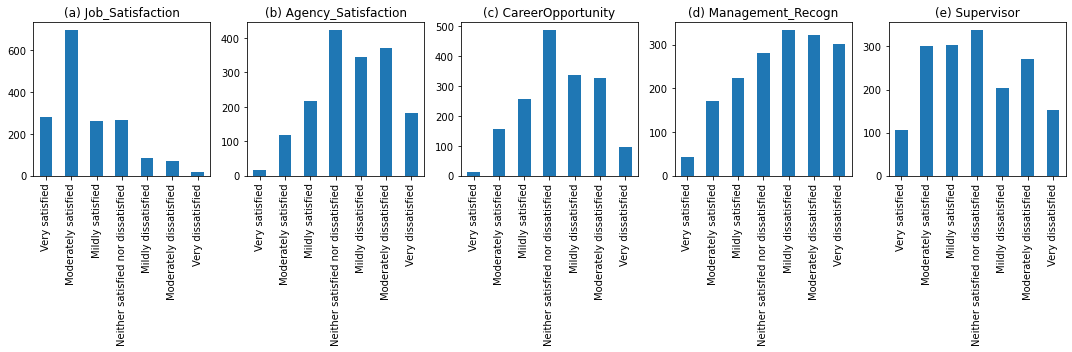

In [190]:
for i, column in enumerate(WLB_poor_female.loc[:,['Job_Satisfaction','Agency_Satisfaction', 'CareerOpportunity',
                                                  'Management_Recogn', 'Supervisor']]):
    response = get_response_key('A1a')
    column_bar = WLB_poor_female[column].fillna(8).value_counts().sort_index()[0:7].rename(response)
    plt.subplot(1, 5, i+1)
    labels = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e'}
    column_bar.plot(kind='bar', title = f'({labels[i]}) {column}', ylabel='', figsize=(15, 5))

plt.tight_layout()
print(f'Figure 30: Satisfactory levels of female employees who are either mildly, moderately or very dissatisfied with work and life balance')

In [191]:
#create a table mean, skewness and skewness using the same condition as figure 30
WLB_mean = np.empty(5,dtype='float64')
WLB_skewness = np.empty(5,dtype='float64')
WLB_skewtest = np.empty(5,dtype='float64')

for i, column in enumerate(WLB_poor_female.loc[:,['Job_Satisfaction','Agency_Satisfaction', 'CareerOpportunity','Management_Recogn', 'Supervisor']]):
    WLB_mean[i] = WLB_poor_female[column].mean()
    WLB_skewness[i] = st.skew(WLB_poor_female[column], nan_policy='omit')
    WLB_skewtest[i] = st.skewtest(WLB_poor_female[column], nan_policy='omit')[1]
    
pd.DataFrame([WLB_mean, WLB_skewness, WLB_skewtest], index = ['mean', 'skewness', 'skewness p-value'], columns = ['Job_Satisfaction','Agency_Satisfaction', 'CareerOpportunity','Management_Recogn', 'Supervisor']).transpose()

,mean,skewness,skewness p-value
Job_Satisfaction,2.674836,0.957168,1.159053e-42
Agency_Satisfaction,4.677015,-0.201925,7.920024e-04
CareerOpportunity,4.405373,-0.050319,3.986984e-01
Management_Recogn,4.716418,-0.301874,7.097860e-07
Supervisor,3.986866,0.125039,3.657914e-02


Female employees who are dissatisfied with work and life balance are mostly satisfied with their job (Figure 30a). More of them are somewhat dissatisfied with the management and/or agency (Figure 30b and 30d). A possible explanation is that too much workload has been put onto some of these female employees, causing longer, unpaid hour in the office or even at home in order to complete the set task(s). Together with the above sections, agencies and their management seem to be two most important factors that associate with unsatisfaction to job, career prospect and/or work and life balance of female employees.

#### Workplace culture in the WA public sector<a class="anchor" id="section4-4"></a> [(Back to the top)](#top)

to be updated....

## 5. Summary and conclusion<a class="anchor" id="section5"></a>

[Back to the top](#top)

Several important observations can be drawn from the analysis of the 2015 WA public service employee perception survey: 
1. There are more female than male staff in the WA public sector overall, but there are actually less women in management/leadership positions by proportion of gender population. 
2. The average annual income of women is significantly lower than men, and by gender proportion more women appear to be in the 'entry level' positions.
3. It is more likely to find women with a University qualification in higher income brackets than male counterpart. 
4. Most of female survey participants are satisfied with their role, there is a higher proportion of dissatisfaction to their agency and its management.
5. Men meet informally with their immediate supervisor significantly more frequently with their supervisor than female employees.
6. The annual preformance review places a significant emphasis on performance rather than career development.
7. There seems to be a lack of information available to employees in general on promotion, and career pathways and development.
8. Women who say the degree of work and life balance unsatisfactory are not satisfied with the agency and recognition from management. This may indicate that an unfair/unexpected workload has been given to them.
9. Most female who are planning to leave their job would like to remain in the public sector.

The survey was conducted in 2015, and although I have made a few recommendations above, some of them might have already been implemented to the WA public sector. As the latest survey data available in the datastore is from 2016, it is difficult to keep track of possible improvements to female positions in the workplace. An action plan was published last year to improve female leadship representation in WA government (http://www.wa.gov.au/sites/default/files/2020-09/Women%20Action%20Plan%202020-2025.pdf), which identified some of the points raised above. This survey would be benefit from having additional information to aid this analysis, such as agency (not just the size), contract type, duration of service and age of each survey participant, although it is possible that these information is hidden from the public to prevent privacy breach. Nevertheless, similar surveys should be conducted in the next decade to follow if the points outlined in the 2020 action plan are realised.

## Supplmentary codes <a class="anchor" id="section7"></a>

[Back to the top](#top)

The following is for exporting one or more pie charts directly from the raw survey data.

```python
def get_response_key(name = 'column'):
    x = merged_key[merged_key['Question ID'] == name]
    y = dict(zip(x['Value'], x['Label']))
    return y

def get_question_key(name = 'column'):
    z = merged_key[merged_key['Question ID'] == name].iloc[0,3]
    #z = merged_key[(merged_key['Question ID'] == name) & (merged_key['Value'] == 1)]['Question']
    return z

plt.figure(figsize=(30, 500))

counter = 1
 
for columni in full_survey.iloc[:, 0:23]: #can do all or selective columns by changing the iloc function 
    response = get_response_key(columni)
    question = get_question_key(columni)
    columni_pie = full_survey[columni].fillna('Not specified').value_counts(sort=False, ascending=True, dropna=False).rename(response)
    
    plt.subplot(55, 2, counter)
    columni_pie.plot(kind='pie', title = f'Question: {columni} -- {question}', ylabel='')
    counter +=1

plt.tight_layout()
```

The following is for exporting one or more pie charts from the cleaned data

```python

plt.figure(figsize=(30, 100))
counter = 1

for column in summary_table_modifed:
    if column == 'Gender':
        pass
    else:
        plt.subplot(16,2,counter) 
        summary_table_modifed[summary_table_modifed['Gender'] == 'Male'][column].value_counts().plot(kind='pie')
        plt.title(column + ', Male')
        plt.ylabel('')
        counter+=1
        
        plt.subplot(16,2,counter) 
        summary_table_modifed[summary_table_modifed['Gender'] == 'Female'][column].value_counts().plot(kind='pie')
        plt.title(column + ', Female')
        plt.ylabel('')
        counter+=1

plt.tight_layout()
```